### *Reading the libraries*

In [1]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import ema_workbench

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### *Seting up the display extent*

In [3]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',138)

## Step 1: Setting Up Climate Scenarios (CH2018, and Random Scenarios)

In [4]:
def is_leap(year):
    """ return true for leap years, False for non leap years """
    return year % 4 == 0 and ( year % 100 != 0 or year % 400 == 0)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

### S1.1. *Function that pruduces new climate (precipitation) realization*

In [5]:
def random_pcp(dfpcp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):
    
    #outFileName = OutFileName
    dfpcpCol = dfpcp.columns
    #sceNum = len(dfCol)

    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    from random import shuffle
    #a = []
    #for x in range(simLen): 
        #randomInd = [z for z in range(sceNum)]
        #shuffle(randomInd)
        #a.append(randomInd)
        
        
    a = []
    for i in range(simLen): 
        randomInd = [z for z in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
    
        
    RCP = RCPNames
    columnsDfpcp = ['sc_' + RCP + str(k) for k in range(1, sceNum+1,1)] 
    c = [[19810101 for p in range(sceNum)]]
    #df1 = 'df' + str(outDFNumber)
    df1pcp = pd.DataFrame(c, columns =columnsDfpcp)
    #df1.to_csv('SAeidVaghefimodified1111222.csv', index = False)

    c.clear()

    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1 # counter i; equal to simulation length (simLen)
            p += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1
                
        #print(m) # this line show the progress of the work by typing the years of simulation

        dfnewpcp = 'df' + str(m)
        dfnewpcp = pd.DataFrame(c, columns =columnsDfpcp)
        c.clear()
        df1pcp = df1pcp.append(dfnewpcp, ignore_index=True)
        
    return df1pcp

### S1.2. *Function that pruduces new climate (temperature) realization*

In [6]:
def random_tmp(dftmp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):

    #dfCol = df.columns
    #sceNum = len(dfCol) // 2
    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    dftmpColMax = dftmp.columns[[i for i in range(0, sceNum*2, 2)]]
    dftmpColMin = dftmp.columns[[i for i in range(1, sceNum*2, 2)]]

    ## yek list be toole 119 ke dakhelesh list haye 68 ta ee darim be soorate random
    from random import shuffle
    #a = []
    #for i in range(simLen): 
        #randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        #shuffle(randomInd)
        #a.append(randomInd)
        
    
    a = []
    for i in range(simLen): 
        randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
        
    #print('end!')

    cT = []
    RCP = RCPNames
    columnsDfOdd = ['sc_' + RCP + str(k)  for k in range(1, sceNum+1,1)] 
    columnsDfEven = [""] * sceNum

    columnsDftmp = []
    #colOdd = ['Scr_' + str(i) for i in range(1, sceNum+1, 1)]
    #colEven = ['' for i in range(1, sceNum+1,1)]

    for i in range (sceNum):
        columnsDftmp.append(columnsDfOdd[i])
        columnsDftmp.append(columnsDfEven[i])


    #### OR:
    #columnsDf = ["Sr", ""] * sceNum
    df1tmp = pd.DataFrame(cT, columns =columnsDftmp)
    #df1.to_csv("rrrrrrrrmodified1111222.csv", index = False)


    cMax = [[19810101 for p in range(sceNum)]]
    cMin = [["" for p in range(sceNum)]]
    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values) 
    
            i += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values)

            i += 1

        c = []
        for y in range(0, len(cMax), 1): # the length of simulation years
            for z in range(sceNum): # range(4)
                c.append(cMax[y][z])
                c.append(cMin[y][z])

        cMax.clear()
        cMin.clear()

        cMain = []
        cMain = list(chunks(c, sceNum * 2))
        #print(m) # this line show the progress of the work by typing the years of simulation

    ### Should be checked

        dfnewtmp = 'dftmp' + str(m)
        #columnsDf = ["Sr", ""]*sceNum
        #columnsDf = [['sc_' + str(k), ""] for k in range(1, sceNum+1,1)] 
        dfnewtmp = pd.DataFrame(cMain, columns =columnsDftmp)
        c.clear()
        df1tmp = df1tmp.append(dfnewtmp, ignore_index=True)
        
    return df1tmp

### S1.3. *Function that calls the random_pcp and random_tmp for all stations of a Ski resort*

In [7]:
def randomness_pcp_tmp(fnames, Xfactor1):
    for f in fnames:
        if 'p.csv' in f:
            print('Writing pcp files started!')
            #df = pd.read_csv('47-0625000_8-6666667p.csv')
            dfpcp = pd.read_csv(f)


            filt1 = dfpcp.columns.str.contains('RCP26|_26_') #12
            filt2 = dfpcp.columns.str.contains('RCP45|_45_') #25
            filt3 = dfpcp.columns.str.contains('RCP85|_85_') #31

            dfpcpRCP26 = dfpcp.loc[:, filt1]
            dfpcpRCP45 = dfpcp.loc[:, filt2]
            dfpcpRCP85 = dfpcp.loc[:, filt3]

            dfpcpRCP26_n = random_pcp(dfpcpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dfpcpRCP45_n = random_pcp(dfpcpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dfpcpRCP85_n = random_pcp(dfpcpRCP85, 1981, 2099, 31, '85_', Xfactor1)


            result = pd.concat([dfpcpRCP26_n, dfpcpRCP45_n, dfpcpRCP85_n], axis=1, sort=False)
            #result.to_csv('47-0625000_8-6666667p_n1.csv', index = False)


            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)
            root = os.getcwd()
            
            '''This part makes a new dir for outouts''' ## should be cooment out later
            #if os.path.isdir(os.path.join(root, 'Outputs_randomness')):
                #pass
            #else: os.mkdir(os.path.join(root, 'Outputs_randomness'))

            #outfolder = os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written

            filepath = os.path.join(outfolder, newName)

            result.to_csv(filepath, index = False)
            print('End of writing pcp files!')
            #print("--- %s seconds ---" % (time.time() - start_time))


        elif 't.csv' in f:
            print('Writing tmp files started!')
            dftmp = pd.read_csv(f)
            dftmpCol = list(dftmp.columns)

            filt1_max = [dftmpCol.index(s) for s in dftmpCol if ("_26_") in s or ("RCP26") in s]
            filt2_max = [dftmpCol.index(s) for s in dftmpCol if ("_45_") in s or ("RCP45") in s]
            filt3_max = [dftmpCol.index(s) for s in dftmpCol if ("_85_") in s or ("RCP85") in s]

            aOnefilt1= [1]*len(filt1_max)
            aOnefilt2= [1]*len(filt2_max)
            aOnefilt3= [1]*len(filt3_max)

            filt1_min = list(map(add, filt1_max, aOnefilt1)) # 
            filt2_min = list(map(add, filt2_max, aOnefilt2))
            filt3_min = list(map(add, filt3_max, aOnefilt3))

            filt1Tot = []
            for i in range(len(filt1_max)):
                filt1Tot.append(filt1_max[i])
                filt1Tot.append(filt1_min[i])

            filt2Tot = []
            for j in range(len(filt2_max)):
                filt2Tot.append(filt2_max[j])
                filt2Tot.append(filt2_min[j])

            filt3Tot = []
            for k in range(len(filt3_max)):
                filt3Tot.append(filt3_max[k])
                filt3Tot.append(filt3_min[k])

            dftmpRCP26 = dftmp[dftmp.columns[filt1Tot]]
            dftmpRCP45 = dftmp[dftmp.columns[filt2Tot]]
            dftmpRCP85 = dftmp[dftmp.columns[filt3Tot]]

            dftmpRCP26_n = random_tmp (dftmpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dftmpRCP45_n = random_tmp (dftmpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dftmpRCP85_n = random_tmp (dftmpRCP85, 1981, 2099, 31, '85_', Xfactor1)

            result = pd.concat([dftmpRCP26_n, dftmpRCP45_n, dftmpRCP85_n], axis=1, sort=False)

            #ewName = 'n'+f
            #ilepath = os.path.join(os.environ.get('HOME'), newName)
            #esult.to_csv(filepath, index = False)

            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)

            #outfolder =os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written
            
            filepath = os.path.join(outfolder, newName)
            result.to_csv(filepath, index = False)

            print('End of writing tmp files')

        else :
            pass

## Step 2: Function for initiating the main dictionary of climate stations

In [8]:
def create_dic(a):
    '''Function: creating a dictionary for each climate station'''
    
    a = {}
    keys = ['fM', 'iPot', 'rSnow', 'dSnow', 'cPrec', 'dP', 'elev', 'lat', 'long', 'fileName']
    a = {key: None for key in keys}
    return a

def initialize_input_dict (mainFolderSki):
    ''' This function returns a dictionary , and addresses of 4 folders'''
    
    
    '''Step 1''' 
    rootFolder = mainFolderSki
    inputFolder = os.path.join(rootFolder,'input')
    ablationFolder = os.path.join(inputFolder, 'Ablation')
    accumulationFolder = os.path.join(inputFolder, 'Accumulation')
    climate_ref_Folder = os.path.join(inputFolder, 'Climate_ref')
    
    
    '''Step 2: Reading all files names inside the Ablation, Accumulation, and Climate folders'''  
    ablationFiles = []
    for filename in os.walk(ablationFolder):
        ablationFiles = filename[2]
    
    accumulationFiles = list()
    for filename in os.walk(accumulationFolder):
        accumulationFiles = filename[2]

    climate_ref_Files = list()
    for filename in os.walk(climate_ref_Folder):
        climate_ref_Files = filename[2]
        
        
    '''Step 3: Reading files inside ablation folder '''
    os.chdir(ablationFolder)
    with open(ablationFiles[0], 'r') as file:
        FM1 = file.read()
    with open(ablationFiles[1], 'r') as file:
        Ipot1 = file.read()
    with open(ablationFiles[2], 'r') as file:
        Rsnow1 = file.read()
        
        
    '''Step 4: Reading the lines of files inside ablation folder'''
    FM1 = FM1.replace('\n', '\t')
    FM1 = FM1.split('\t')
    Ipot1 = Ipot1.replace('\n', '\t').split('\t')
    Rsnow1 = Rsnow1.replace('\n', '\t').split('\t')
        
        
    '''Step 5: Reading the lines of files inside accumulation folder''' 
    os.chdir(accumulationFolder)
    
    with open(accumulationFiles[0], 'r') as file:
        cPrec = file.read()
    with open(accumulationFiles[1], 'r') as file:
        dSnow1 = file.read()
    
    cPrec = cPrec.replace('\n', '\t')
    cPrec = cPrec.split('\t')
    dSnow1 = dSnow1.replace('\n', '\t').split('\t')
    
    
    '''Step 6: Reading the lines of files inside climate folder''' 
    os.chdir(climate_ref_Folder)
    
    with open('pcp.txt', 'r') as file:
        pcpData = file.read()
    with open('tmp.txt', 'r') as file:
        tmpData = file.read()
        
    pcpData = pcpData.split('\n')
    
    for i in range(len(pcpData)):
        pcpData[i] = pcpData[i].split(',')
        
        
    '''Step 7: Initialazing the input dictionary of climate stations which holds the information of accumulation
     and ablation, and etc of the stations''' 
    nameStn = []
    for file in climate_ref_Files:
        if 'p.csv' in file:
            #nameStn.append('n_' + file[-25: -5])
            nameStn.append(file[-25: -5])

    stnDicts = []
    for i in range(len(nameStn)):
        stnDicts.append(create_dic(nameStn[i]))
    
    
    '''Step 8: Assigning the file names to the dictionary'''
    for i in range (len(nameStn)):
        stnDicts[i]['fileName'] = nameStn[i]

    
    '''Step 9: Assigning the accumulation and ablation values'''
    for stnDict in stnDicts:
        for i, element in enumerate(FM1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['fM'] = FM1[i+1]
                
        for i, element in enumerate(Ipot1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['iPot'] = Ipot1[i+1]

        for i, element in enumerate(Rsnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:  
                stnDict['rSnow'] = Rsnow1[i+1]

        for i, element in enumerate(dSnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['dSnow'] = dSnow1[i+1]

        for i, element in enumerate(cPrec):
            stnDict['cPrec'] = cPrec[1]
            stnDict['dP'] = cPrec[3]
            
    '''Step 10: Assigning the elevation, Lat and long to the dictionaries'''
    for i in range(len(stnDicts)):
        for j in range(1, len(pcpData)):
            
            #if pcpData[j][1][2:-1] == stnDicts[i]['fileName'][2:]:
            if pcpData[j][1][:-1] == stnDicts[i]['fileName'][:]:
                stnDicts[i]['lat']= pcpData[j][2]
                stnDicts[i]['long']= pcpData[j][3]
                stnDicts[i]['elev']= pcpData[j][4]
                
    return stnDicts, inputFolder, ablationFolder, accumulationFolder, climate_ref_Folder

## Step 3: Main Snow Model

#### S3.1 *Initializiing the main dictionary for a case study*

In [11]:
caseStudyStns = {}
inputFolder = ''
ablationFolder = ''
accumulationFolder = ''
climateFolder = ''
climateFolder1 = ''
climateFolder2 = ''
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case2_Atzmaening'
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case6_davos_elevations'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584'

## calling the function with multiple return values
caseStudyStns, inputFolder, ablationFolder, accumulationFolder, climateFolder = initialize_input_dict(root)

#### S3.2 *Check if we have initialized correctly*

In [12]:
climateFolder

'C:\\Saeid\\Prj100\\SA_2\\snowModelUZH\\case5_champex\\input\\Climate_ref'

In [13]:
caseStudyStns

[{'fM': '1.376',
  'iPot': '102',
  'rSnow': '1.22',
  'dSnow': '0.5',
  'cPrec': '0',
  'dP': '10',
  'elev': '2350',
  'lat': '46.0208333',
  'long': '7.1041667',
  'fileName': '46-0208333_7-1041667'}]

In [14]:
caseStudyStns[0].get("fM")

'1.376'

#### Check the X variables which control modeling (hyper parameter)

In [15]:
X2fM = caseStudyStns[0].get("fM") # change 0 to i for all stations
X3iPot = caseStudyStns[0].get("iPot")
X4rSnow =  caseStudyStns[0].get("rSnow")

In [16]:
print(X2fM)
print(X3iPot)
print(X4rSnow)

1.376
102
1.22


#### S3.3 *Function that runs the main model*

In [17]:
## 1st column as index: makaing date from 01 01 1981 to 2099 12 31
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date ).days + 1)):
        yield start_date + timedelta(n)

In [18]:
### 
def policy_release1(x1SnowThershold):
    return x1SnowThershold


### OR Let's make this function in a more OOP way:
class Policy_Ski:
    def __init__(self, x1SnowThershold):
        self.x1SnowThershold = x1SnowThershold
        
    def policy_release2(self):
        return(self.x1SnowThershold)
    
    def policy_release3(self):
        ''' this function should make a matrix of evaluation fot the condition of 100 day ay minimum condition'''
        pass

In [19]:
class Economic_Model_Ski:
    def __init__(self, xCostDay, xRevenueDay):
        self.costDayFixed = xCostDay
        self.revenueDayFixed = xRevenueDay
        
    def economic_costDay(self):
        return(self.costDayFixed)
    
    def economic_revenueDay(self):
        return(self.revenueDayFixed)

In [20]:
class RCP_Model:
    def __init__(self, xRCP, xClimateModel):
        self.input1 = round(xRCP)
        self.input2 = xClimateModel  
        
    def rcpGenerator(self):
        if self.input1 == 1:
            RCP = str(2.6)
            rcpInt = 1
        if self.input1 == 2:
            RCP = str(4.5)
            rcpInt = 2
        if self.input1 == 3:
            RCP = str(8.5)
            rcpInt = 3
        return(RCP, rcpInt)

    
    def climateModel(self):
        a, b = RCP_Model.rcpGenerator(self)
        
        if b == 1:
            climateModel = round(self.input2*11)
            
        elif b == 2:
            climateModel = 11 + max(1,round(self.input2*25))
            
        else:
            climateModel = 36 + max(1, round(self.input2*31))
            
        return (int(climateModel))

In [21]:
os.chdir(climateFolder)
fnames = os.listdir()
print(fnames)

['46-0208333_7-1041667p.csv', '46-0208333_7-1041667t.csv', 'pcp.txt', 'tmp.txt']


In [22]:
'''RCP and Climate Model Controler'''
#rcp_Model = RCP_Model(1.545008,0.5991817)
rcp_Model2 = RCP_Model(1.545008,0.00909991817)
RCP11, intRCP11 = rcp_Model2.rcpGenerator()
climateModel11 = rcp_Model2.climateModel()

In [23]:
print(RCP11)
print(intRCP11)
print(climateModel11)

4.5
2
12


## XLR Framework

In [24]:
def snow_Model (xRCP=None, xClimateModel=None, Xfactor1 = None,  X2fM = None, X3iPot = None, X4rSnow = None, 
                X5temp = None, X6tempArt = None, xCostDay = None, xRevenueDay = None, x1SnowThershold = None,
                xGoodDays = None):
    '''' This function controls the Ski resort model'''
    
    
    ''' VERY IMPORTANT --- Controling the randomness --- VERY IMPORTANT'''
    
    #if 0 <= xClimateRandomness <= 68 :
     #   os.chdir(climateFolder)
      #  fnames = os.listdir()
    #elif 69 <= xClimateRandomness <= 138 :
     #   os.chdir(climateFolder1)
      #  fnames = os.listdir()
    #else: 
     #   os.chdir(climateFolder2)
      #  fnames = os.listdir()
        
    os.chdir(climateFolder)
    fnames = os.listdir()
    #randomness_pcp_tmp(fnames, Xfactor1)
    
    print('Snow_Model: Matching the station names values with CSV files!')   
    '''Matching the station names values in the dictionary of stations with CSV files in Climate folder of the case Study'''
    pcpCaseStudy = []
    tmpCaseStudy = []

    for i in range(len(caseStudyStns)):
        pcpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 'p.csv'))
        tmpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 't.csv'))
    

    print('Snow_Model: Building a database for each csv file (tmp and pcp)!')
    
    '''Step 6: building a database for each precipitation and temperature file in Climate folder and saving them in a list'''
    '''6.1 reading the csv files as databases'''
    dfpcp = [None for _ in range(len(pcpCaseStudy))]
    dftmp = [None for _ in range(len(tmpCaseStudy))]
    for i in range(len(pcpCaseStudy)):
        dfpcp[i] = pd.read_csv(pcpCaseStudy[i])
        dftmp[i] = pd.read_csv(tmpCaseStudy[i])
        
    '''6.2 making a header for output files'''
    dfpcpCol = dfpcp[0].columns
    dftmpCol = dftmp[0].columns
    
    '''6.3 defining the length of simulations and scenarios'''
    scenariosLength = len(dfpcpCol)
    simulationLength = len(dftmp[0][dftmpCol[0]]) - 1
        
    
    '''Reading the beginning and end of the simulation''' 
    start_date = date(1981, 1, 1)
    end_date = date(2099, 12, 31)
    dateList = []
    for single_date in daterange(start_date, end_date):
        dateList.append(single_date.strftime("%m/%d/%Y"))

    seasonList = []
    for n in range (1981, 2100, 1):
        seasonList.append(str(n))
    
    
    print('Snow_Model: Part 1 Running the model, daily output!')

    '''################################ PART1 ################################'''
    '''Running the model for each climate station:'''
    
    for k in range(len(caseStudyStns)):
        
        '''making a header for output files'''
        dfpcpCol = dfpcp[k].columns
        dftmpCol = dftmp[k].columns

        #X2fM = caseStudyStns[k].get("fM") # change 0 to i for all stations
        #X3iPot = caseStudyStns[k].get("iPot")
        #X4rSnow =  caseStudyStns[k].get("rSnow")
        

        '''defining the length of simulations and scenarios'''
        #scenariosLength = len(dfpcpCol)
        scenariosLength = 1
        simulationLength = len(dftmp[0][dftmpCol[0]]) - 1


        '''declaring the initial arrays'''
        accumulation = [0 for _ in range(simulationLength)]
        ablation =  [0 for _ in range(simulationLength)]
        snowDeposite = [0 for _ in range(simulationLength)]
        total = np.zeros([simulationLength, 3*scenariosLength])
        
        
        '''declaring the new variables for financial analyses and temrature Index for artificial snow making'''
        artSnowCheck = [0 for _ in range(simulationLength)]
        revenue = [0 for _ in range(simulationLength)]
        cost = [0 for _ in range(simulationLength)]
        profit = [0 for _ in range(simulationLength)]
        totalMoney = np.zeros([simulationLength, 4*scenariosLength])


        '''RCP and Climate Model Controler'''
        rcp_Model = RCP_Model(xRCP, xClimateModel)
        RCP, intRCP = rcp_Model.rcpGenerator()
        climateModel = rcp_Model.climateModel()
        
        
        '''Running the model for each climate scenario:'''
        for j in range(climateModel, climateModel + 1, 1):
            
            
        #for j in range(len(dfpcpCol)):
            ## Reading the information and inputs of the first day of simulation
            todayPCP = dfpcp[k][dfpcpCol[j]].iloc[1] if (dfpcp[k][dfpcpCol[j]].iloc[1] != -99) else 0
            todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[1],2) if(dftmp[k][dftmpCol[2*j]].iloc[1] != -99) else 0
            todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[1],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[1] != -99) else 0
            todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

            
            '''Thershold 300 mm
            EMA_workbench_controler for the thershold of good snow condition'''
            #A = policy_release1(x1SnowThershold)
            
            
            policySkiResort = Policy_Ski(x1SnowThershold) ## 300 mm
            snowThershold = policySkiResort.policy_release2()
            
            
            
            '''EMA_workbench_controler for the thershold daily fixed revenue and cost expenses'''
            economyDaySki = Economic_Model_Ski(xCostDay, xRevenueDay) 
            revenueDayFixed = economyDaySki.economic_revenueDay()  # self.revenueDayFixed
            costDayFixed = economyDaySki.economic_costDay()  # self.costDayFixed
            

          
            '''Accumulation for the first day:'''
            if (todayTMPAVE) <= X5temp:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

            elif X5temp -1 < (todayTMPAVE) <= X5temp + 1:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5temp + 1 -todayTMPAVE)/2)

            else: accumulation[0] = 0


            '''Ablation for the first day:'''
            if todayTMPAVE <= X5temp:
                 ablation[0] = 0
            else: 
                #ablation[0] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)
                ablation[0] = (float(X2fM) + float(X4rSnow)*float(X3iPot)*0.001)*float(todayTMPAVE)*(1+0)

                
            '''Main mass balance equation for the first day:'''
            snowDeposite[0] = 0 if (0 + accumulation[0] - ablation[0]) < 0 else (0 + accumulation[0] - ablation[0])

            
            '''storing three values in a list for the first day'''
            #total[0,3*j+0] = round((accumulation[0] - ablation[0]), 2)
            #total[0,3*j+1] = round(snowDeposite[0], 2)
            #total[0,3*j+2] = 1 if (total[0,3*j+1] > snowThershold) else total[0,3*j+1] / snowThershold
            
            total[0,0] = round((accumulation[0] - ablation[0]), 2)
            total[0,1] = round(snowDeposite[0], 2)
            total[0,2] = 1 if (total[0,1] > snowThershold) else total[0,1] / snowThershold


            
            '''Check the posiibility of Snow Making'''
            if (todayTMPAVE) <= X6tempArt:
                artSnowCheck[0] = 1
            
            elif X6tempArt < (todayTMPAVE) <= X6tempArt + 2:
                artSnowCheck[0] = 1 * float((X6tempArt + 2 -todayTMPAVE)/2)
                
            else:
                artSnowCheck[0] = 0
                
                
            '''Revenue and financial status'''
            #revenue[0] = round((total[0,3*j+2] * 10), 2)
            revenue[0] = float(round(revenueDayFixed,2)) if (total[0,2] > snowThershold ) else float(round(revenueDayFixed,2))*float((total[0,2] / snowThershold))
            
            '''Cost'''
            #cost[0] = round((revenue[0] * 0.4) , 2)
            #cost[0] = float(round(costDayFixed, 2)) if (total[0,3*j+2] > snowThershold ) else float(round(costDayFixed,2))*float((total[0,3*j+2] / snowThershold)) 
            #cost[0] = float(round(costDayFixed, 2)) if (total[0,3*j+2] > snowThershold else float(round(costDayFixed,2))*float((total[0,3*j+2] / snowThershold))
            cost[0] = float(round(costDayFixed, 2)) if (total[0,2] > snowThershold ) else float(round(costDayFixed,2))*float((total[0,2]*2 / snowThershold))
                                                        
            '''Profit'''
            profit[0] = revenue[0] - cost[0]
            

            '''Storing the artificial snow possibility check and financial situation'''
            #totalMoney[0,1*j+0] = round(100.345, 2)
            totalMoney[0,0] = round(artSnowCheck[0], 2)
            totalMoney[0,1] = round(revenue[0], 2)
            totalMoney[0,2] = round(cost[0], 2)
            totalMoney[0,3] = round(profit[0], 2)
            
            
            '''For the SECOND DAY to the End of Simulation:'''
            i = 0
            for i in range(2, simulationLength + 1, 1):
                '''# precipitation and temperature missing values were handled'''
                todayPCP = dfpcp[k][dfpcpCol[j]].iloc[i] if (dfpcp[k][dfpcpCol[j]].iloc[i] != -99) else 0
                todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[i],2) if(dftmp[k][dftmpCol[2*j]].iloc[i] != -99) else 0
                todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[i],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[i] != -99) else 0
                todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

                '''### Accumulation :'''
                if(todayTMPAVE) <= X5temp:
                    ##
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

                elif X5temp -1 < (todayTMPAVE) <= X5temp + 1:
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5temp + 1 -todayTMPAVE)/2)

                else: accumulation[i-1] = 0

                '''### Ablation :'''
                if todayTMPAVE <= X5temp:
                    ablation[i-1] = 0
                else: 
                    #ablation[i-1] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)
                    ablation[i-1] = (float(X2fM) + float(X4rSnow)*float(X3iPot)*0.001)*float(todayTMPAVE)*(1+0)

                '''### Main mass balance equation for second day to the end of simulation:'''
                snowDeposite[i-1] = 0 if (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1]) < 0 else (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1])


                '''### storing three values in a list''' 
                total[i-1,0] = round((accumulation[i-1] - ablation[i-1]) , 2)
                total[i-1,1] = round(snowDeposite[i-1], 2)
                #total[i-1,3*j+2] = 1 if (total[i-1,3*j+1] > A) else 0
                total[i-1,2] = 1 if (total[i-1,1] > snowThershold) else total[i-1,1] / snowThershold

                
                ## 2020/06/22
                '''Check the posiibility of Snow Making'''
                if (todayTMPAVE) <= X6tempArt:
                    artSnowCheck[i-1] = 1

                elif X6tempArt < (todayTMPAVE) <= X6tempArt + 2:
                    artSnowCheck[i-1] = 1 * float((X6tempArt + 2 -todayTMPAVE)/2)

                else:
                    artSnowCheck[i-1] = 0
                
                
                '''Revenue'''
                #revenue[i-1] = round((total[i-1,3*j+2] * 10), 2)
                revenue[i-1] = float(round(revenueDayFixed,2)) if (total[i-1,2] > snowThershold ) else float(round(revenueDayFixed,2))*float((total[i-1,2] / snowThershold))

                '''Cost'''
                #cost[i-1] = round((revenue[i-1] * 0.4) , 2)
                #cost[i-1] = float(round(costDayFixed, 2)) if (total[i-1,3*j+2] >  snowThershold ) else float(round(costDayFixed,2))*float((total[i-1,3*j+2] /  snowThershold)) 
                #cost[i-1] = float(round(costDayFixed, 2))
                cost[i-1] = float(round(costDayFixed, 2)) if (total[i-1,2] >  snowThershold ) else float(round(costDayFixed,2))*float((total[i-1,2]*2 /  snowThershold)) 
                
                '''Profit'''
                profit[i-1] = revenue[i-1] - cost[i-1]

                
                '''Storing the artificial snow possibility and financial situation'''
                totalMoney[i-1,0] = round(artSnowCheck[i-1], 2)
                totalMoney[i-1,1] = round(revenue[i-1], 2)
                totalMoney[i-1,2] = round(cost[i-1], 2)
                totalMoney[i-1,3] = round(profit[i-1], 2)
                             

        '''Saving the Outputs of total list in a CSV file in a specific path'''

        ## 1st row as the column names:
        
        columnsDF = []
        columnsDF_aerSnowCheck = []
        
        #for col in dfpcpCol[j]:
        #    columnsDF.append('SnowAmount_' + col)
        #    columnsDF.append('TotalSnowAmount_' + col)
        #    columnsDF.append('isOverSnow_' + col)
        #    columnsDF_aerSnowCheck.append('ArtSnowPossibility_' + col)
        #    columnsDF_aerSnowCheck.append('Revenue_' + col)
        #    columnsDF_aerSnowCheck.append('Cost_' + col)
        #    columnsDF_aerSnowCheck.append('Money_' + col)
        
        
        #nameHeader = dfpcpCol[int(xClimateModel)]
        nameHeader = dfpcpCol[climateModel]

        
        columnsDF.append('SnowAmount_' + nameHeader)
        columnsDF.append('TotalSnowAmount_' + nameHeader)
        columnsDF.append('isOverSnow_' + nameHeader)
        columnsDF_aerSnowCheck.append('ArtSnowPossibility_')
        columnsDF_aerSnowCheck.append('Revenue_' + nameHeader)
        columnsDF_aerSnowCheck.append('Cost_' + nameHeader)
        columnsDF_aerSnowCheck.append('Money_' + nameHeader)
         
        
        '''Snow daily'''
        columnsDF0 = ['DATE']
        dfnew0 = pd.DataFrame(dateList, columns = columnsDF0)
        dfnew1 = pd.DataFrame(total, columns = columnsDF)
        df1 = pd.concat([dfnew0, dfnew1], axis=1, sort=False)
        
        '''Money and Artifical Snow'''
        dfnew2 = pd.DataFrame(totalMoney, columns = columnsDF_aerSnowCheck)
        df2 = pd.concat([dfnew0, dfnew2], axis=1, sort=False)
        

        if os.path.isdir(os.path.join(root, 'Outputs_py')):
            pass
        else: os.mkdir(os.path.join(root, 'Outputs_py'))

            
        '''daile Snow Outputs'''
        outfolder =os.path.join(root, 'Outputs_py') 
        outfileName = 'Total_daily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile = os.path.join(outfolder, outfileName )
        df1.to_csv(outputFile, index = False)
        
        
        '''Artificial Snow and Financial Outputs'''
        outfileName2 = 'Total_Moneydaily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile2 = os.path.join(outfolder, outfileName2)
        df2.to_csv(outputFile2, index = False)
        #return df1, df2
        
        print('End of Part 1 Calculations!')
        
        '''################################ PART2 ################################'''
        '''##### PART 2 seasonal outputs Tipping points and Liklihood of Survival#####'''
        
        print('Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!')
        
        #### 2020/06/10 ####
        total_Daily_FilesAll = list()
        total_Daily_Files = []
        
        #### 2020/06/22 ####
        total_Money_Files = []
        
        for filename in os.walk(outfolder):
            total_Daily_FilesAll = filename[2]

        for bIndex in range (len(total_Daily_FilesAll)):        
            if 'Moneydaily_' in total_Daily_FilesAll[bIndex]:
                total_Money_Files.append(total_Daily_FilesAll[bIndex])
            elif 'Total_daily_' in total_Daily_FilesAll[bIndex]:
                total_Daily_Files.append(total_Daily_FilesAll[bIndex])
            else: continue
                
                            
        
        '''##Adding the whole address of directory to the name of total daily snow files'''
        totalFiles = []
        for i in range(len(total_Daily_Files)):
            totalFiles.append(os.path.join(outfolder, total_Daily_Files[i]))
        
                
        '''##Adding the whole address of directory to the name of total daily money files'''
        totalMoneyFiles = []
        for i in range(len(total_Money_Files)):
            totalMoneyFiles.append(os.path.join(outfolder, total_Money_Files[i]))
        
        
        print('Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!')
        
        
        ## databases are read here: 
        dfSeason = [ None for _ in range(len(totalFiles))]
        
        ##2020/06/22
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        ##Here we calcluate seasonal tipping points here
        for i in range(len(totalFiles)):
            dfSeason[i] = pd.read_csv(totalFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 1)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df2 = dfSeason[i]
            df2.set_index('DATE', inplace = True)
            df2Col = df2.columns

            df2ColCal = []
            
            for m in range(1):
            #for m in range(68):
                df2ColCal.append(df2Col[3*m+2])

            sumGoodCondition = np.zeros([len(start_season), len(df2ColCal)])
            sumRows = np.zeros(len(df2ColCal))  ### Saeed  2020/06/11


            for j in range(len(df2ColCal)):
                for k in range(len(start_season)):
                #for i in range(3):
                    start_date = start_season[k]
                    end_date = end_season[k]
                        #start_date = date(1981, 1, 2)
                        #end_date = date(1981, 1, 10)
                    for single_date in daterange(start_date, end_date):
                        sumGoodCondition[k,j] += df2[df2ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                    sumRows[j] +=  sumGoodCondition[k,j] ### Saeed  2020/06/11
            
            #AveragesumRows = np.average(sumRows/len(df2ColCal))
            AveragesumRows = np.average(sumRows/118)  ## Saeed 2020/07/31
            df3 = pd.DataFrame(sumGoodCondition, columns = df2ColCal)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF1 = ['Season']
            dfnew3 = pd.DataFrame(firstCol, columns = columnsDF1)

            dfFinalSeason = pd.concat([dfnew3, df3], axis=1, sort=False)          
            
            if os.path.isdir(os.path.join(root, 'outSeason')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeason'))
            
            outfileNameSeason = 'season_' + total_Daily_Files[i]
            outFolderSeason = os.path.join(root, 'outSeason')
            outputFileSeason = os.path.join(outFolderSeason, outfileNameSeason)
            
            outFilesFinal = []
            for filename in os.walk(outFolderSeason):
                outFilesFinal = filename[2]
                iii = len(outFilesFinal)
                if os.path.isfile(outputFileSeason):
                    newOutFileNameSeason = outputFileSeason[0 : -4] + '_' + str(iii) + '.csv'
                    dfFinalSeason.to_csv(newOutFileNameSeason, index = False)
                else: 
                    dfFinalSeason.to_csv(outputFileSeason, index = False)
            
            
            
            print('Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!')
            
            df_sum_ch2018 = dfFinalSeason
            ### We transfer the data to a Matrix dfFinalSeason
            df_sum_ch2018_M = df_sum_ch2018.iloc[0: , 1:]
            df_sum_ch2018_Matrix = df_sum_ch2018_M.to_numpy()
            df_sum_ch2018_M_Columns= df_sum_ch2018_M.columns


            ## We initialize the Matrix of Survival
            #reportMatrix = np.zeros((118, 68))
            reportMatrix = np.zeros((118, 1))

            ## We Calculate the Chance of Survival
            xGoodDays_Condiion  = xGoodDays
            for j in range (len(df_sum_ch2018_M_Columns)):
                for iii in range(len(df_sum_ch2018_M[df_sum_ch2018_M_Columns[0]])):
                    if df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] < xGoodDays:
                        reportMatrix[iii,j] = (df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] / xGoodDays) * 100
                    else:
                        reportMatrix[iii,j] = 100

                        
            AveragereportMatrix = np.average(reportMatrix/118)
            #we sevae the results in a database
            dfFinalSeasonLikelihood_noFirstCol = pd.DataFrame(reportMatrix, columns = df_sum_ch2018_M_Columns)
            dfFinalSeasonLikelihood = pd.concat([dfnew3, dfFinalSeasonLikelihood_noFirstCol], axis=1, sort=False)

            #make a directory for outputs of part 4
            if os.path.isdir(os.path.join(root, 'outSeason_Likelihood_survival')):
                pass
            else:
                os.mkdir(os.path.join(root, 'outSeason_Likelihood_survival'))

            outfileNameSeasonLikelihood = 'season_Likelihood_' +  total_Daily_Files[i]
            outFolderSeasonLikelihood = os.path.join(root, 'outSeason_Likelihood_survival')
            outputFileSeasonLikelihood = os.path.join(outFolderSeasonLikelihood, outfileNameSeasonLikelihood)

            ####
            outFilesFinalLikelihood = []
            for fname in os.walk(outFolderSeasonLikelihood): 
                outFilesFinalLikelihood = fname[2]
                qq = len(outFilesFinalLikelihood)
                if os.path.isfile(outputFileSeasonLikelihood):
                    newOutFileNameSeasonLikelihood = outputFileSeasonLikelihood[0 : -4] + '_' + str(qq) + '.csv'
                    dfFinalSeasonLikelihood.to_csv(newOutFileNameSeasonLikelihood, index = False)
                else:
                    dfFinalSeasonLikelihood.to_csv(outputFileSeasonLikelihood, index = False)    

        print('End of Part 2 Calculations')
        
        '''################################ PART3 ################################'''
        '''##### PART 3 seasonal outputs for Artificial snow possibility and Economic Model#####'''
        print('PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!')
        
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        for i in range(len(totalMoneyFiles)):
            dfSeasonMoney[i] = pd.read_csv(totalMoneyFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 1)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df4 = dfSeasonMoney[i]
            df4.set_index('DATE', inplace = True)
            df4Col = df4.columns
            df4ColCal = []   # list columns 
            df4ColCalMoney = [] 
            
            #### Here is the syntax that controls the columns that should be taken to account for cal
            for m in range(1):
                df4ColCal.append(df4Col[4*m+0])
                df4ColCalMoney.append(df4Col[4*m+3])

            sumGoodArtSnow = np.zeros([len(start_season), len(df4ColCal)])
            sumRowsArtSnow = np.zeros(len(df4ColCal))  ### Saeed  2020/06/11
            
            
            sumProfit = np.zeros([len(start_season), len(df4ColCalMoney)])
            sumRowsProfit = np.zeros(len(df4ColCalMoney))
            
            '''Artificial Snow'''
            for j in range(len(df4ColCal)):
                for k in range(len(start_season)):
                
                    start_date = start_season[k]
                    end_date = end_season[k]
                        
                        
                    for single_date in daterange(start_date, end_date):
                        sumGoodArtSnow[k,j] += df4[df4ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        sumProfit[k,j] += df4[df4ColCalMoney[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        
                    sumRowsArtSnow[j] +=  sumGoodArtSnow[k,j] ### Saeed  2020/06/22
                    sumRowsProfit[j] += sumProfit[k,j]
            
            
            AveragesumRowsArtSnow = np.average(sumRowsArtSnow/len(df4ColCal))
            AveragesumRowsProfit = np.average(sumRowsProfit/len(df4ColCalMoney))
            
            df5 = pd.DataFrame(sumGoodArtSnow, columns = df4ColCal)
            df6 = pd.DataFrame(sumProfit, columns = df4ColCalMoney)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF2 = ['Season']
            dfnew4 = pd.DataFrame(firstCol, columns = columnsDF2)

            dfFinalSeasonArtSnow = pd.concat([dfnew4, df5], axis=1, sort=False)
            dfFinalSeasonFinancial = pd.concat([dfnew4, df6], axis=1, sort=False)

            
            if os.path.isdir(os.path.join(root, 'outSeasonArt')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonArt'))
            
            if os.path.isdir(os.path.join(root, 'outSeasonFinancial')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonFinancial'))
                
                
            
            outfileNameSeasonArt = 'season_Art_' + total_Money_Files[i]
            outFolderSeasonArt = os.path.join(root, 'outSeasonArt')
            outputFileSeasonArt = os.path.join(outFolderSeasonArt, outfileNameSeasonArt)
            
            
            outfileNameSeasonMoney = 'season_Financial_' + total_Money_Files[i]
            outFolderSeasonMoney = os.path.join(root, 'outSeasonFinancial')
            outputFileSeasonMoney = os.path.join(outFolderSeasonMoney, outfileNameSeasonMoney)
                
            
            ##### Moshkel injast
            outFilesFinalArt = []
            for filename in os.walk(outFolderSeasonArt):
                outFilesFinalArt = filename[2]
                jjj = len(outFilesFinalArt)
                if os.path.isfile(outputFileSeasonArt):
                    newOutFileNameSeasonArt = outputFileSeasonArt[0 : -4] + '_' + str(jjj) + '.csv'
                    dfFinalSeasonArtSnow.to_csv(newOutFileNameSeasonArt, index = False)
                else: 
                    dfFinalSeasonArtSnow.to_csv(outputFileSeasonArt, index = False)
        
            ####
            outFilesFinalMoney = []
            for fname in os.walk(outFolderSeasonMoney): 
                outFilesFinalMoney = fname[2]
                q = len(outFilesFinalMoney)
                if os.path.isfile(outputFileSeasonMoney):
                    newOutFileNameSeasonMoney = outputFileSeasonMoney[0 : -4] + '_' + str(q) + '.csv'
                    dfFinalSeasonFinancial.to_csv(newOutFileNameSeasonMoney, index = False)
                else:
                    dfFinalSeasonFinancial.to_csv(outputFileSeasonMoney, index = False)
            
            
            print('End of all calculations')
        
        #return df1, outfolder, dfFinalSeason
        #return {'y' : x1 * Xfactor1 * X2}
        return {'y' : AveragesumRows, 'y1' : climateModel, 'y2' : dfpcpCol[climateModel], 'y3' : sumRows,
                'y4' : AveragesumRowsArtSnow, 'y5' : AveragesumRowsProfit  ,'y6' : AveragereportMatrix }

## Step 4: EMA_Workbench connector

In [25]:
'''
Created on 20 dec. 2010

This file illustrated the use the EMA classes for a contrived example
It's main purpose has been to test the parallel processing functionality

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
from __future__ import (absolute_import, print_function, division,
                        unicode_literals)

from ema_workbench import (Model, RealParameter, Constant, ScalarOutcome, ema_logging,
                          perform_experiments, TimeSeriesOutcome, ArrayOutcome)

In [26]:
import time
start_time = time.time()

if __name__ == '__main__':
    ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
    ema_logging.log_to_stderr(ema_logging.INFO)

    model = Model('UZHModel', function = snow_Model)  # instantiate the model
    
    
    # specify process model parameters  xRCP=None, xClimateModel=None
    model.uncertainties = [RealParameter("xRCP", 0.51, 3.49),
                           RealParameter("xClimateModel", 0, 1),
                           RealParameter("X2fM", 1.01, 1.61),
                           RealParameter("X3iPot", 900, 1100),                        
                           RealParameter("X5temp", 0, 6.0),
                           RealParameter("X6tempArt", -2.0, -1.0)]
    
    # specify polices
    model.levers = [RealParameter("x1SnowThershold", 200.0, 300.0),
                    RealParameter("xGoodDays", 70.0 , 100.0)]
   

    # specify outcomes
    model.outcomes = [ScalarOutcome('y'),
                      ScalarOutcome('y1'),
                      ArrayOutcome('y3'),
                      ScalarOutcome('y4'),
                      ScalarOutcome('y5'),
                      ScalarOutcome('y6')]
    
    # override some of the defaults of the model
    model.constants = [Constant("Xfactor1", 1.4),
                       Constant("X4rSnow", 0.7),
                       Constant("xCostDay", 6),
                       Constant("xRevenueDay", 10)]
    

    results = perform_experiments(model, 120, 50)
    

print('end!')
training_time = time.time() - start_time

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 120 scenarios * 50 policies * 1 model(s) = 6000 experiments
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially


Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Pa

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 600 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 1200 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 1800 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 2400 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 3000 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 3600 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 4200 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 4800 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 5400 cases completed


End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!
End of Part 2 Calculations
PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!
End of all calculations
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Part 1 Running the model, daily output!
End of Part 1 Calculations!
Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!
Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!
Snow

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 6000 cases completed
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] experiments finished


End of all calculations
end!


## Simulation time

In [27]:
print("--- %s seconds ---" % (training_time))
print('training time : {} mins and {} seconds'.format((training_time // 60) , round((training_time % 60), 1)))

--- 67598.45912337303 seconds ---
training time : 1126.0 mins and 38.5 seconds


In [28]:
print("--- %s seconds ---" % (training_time))
print('training time : {} mins and {} seconds'.format((training_time // 60) , round((training_time % 60), 1)))
print('training time : {} hours {} mins and {} seconds '.format((training_time // 3600), round((training_time -((training_time // 3600))) // 60) , round((training_time % 60), 1)))

--- 67598.45912337303 seconds ---
training time : 1126.0 mins and 38.5 seconds
training time : 18.0 hours 67598 mins and 38.5 seconds 


In [29]:
#results

## Save the outputs

In [2]:
from ema_workbench import save_results
#save_results(results, r'./1000 runs.tar.gz')
save_results(results, r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3\6000_runs.tar.gz')


## Step 5: Model deployment

## Load the outputs

In [3]:
'''
Created on 20 sep. 2011

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import load_results, ema_logging

from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,
                                                   pairs_density)

ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
fh = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3\6000_runs.tar.gz'
experiments, outcomes = load_results(fh)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3\6000_runs.tar.gz


In [4]:
print(experiments.shape)
print(list(outcomes.keys()))

(6000, 11)
['y', 'y1', 'y3', 'y4', 'y5', 'y6']


In [5]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

## Step 6: Visualization of the EMA_Workbench Results

### Visualization with ema-workbench - part1

[MainProcess/DEBUG] generating pairwise scatter plot


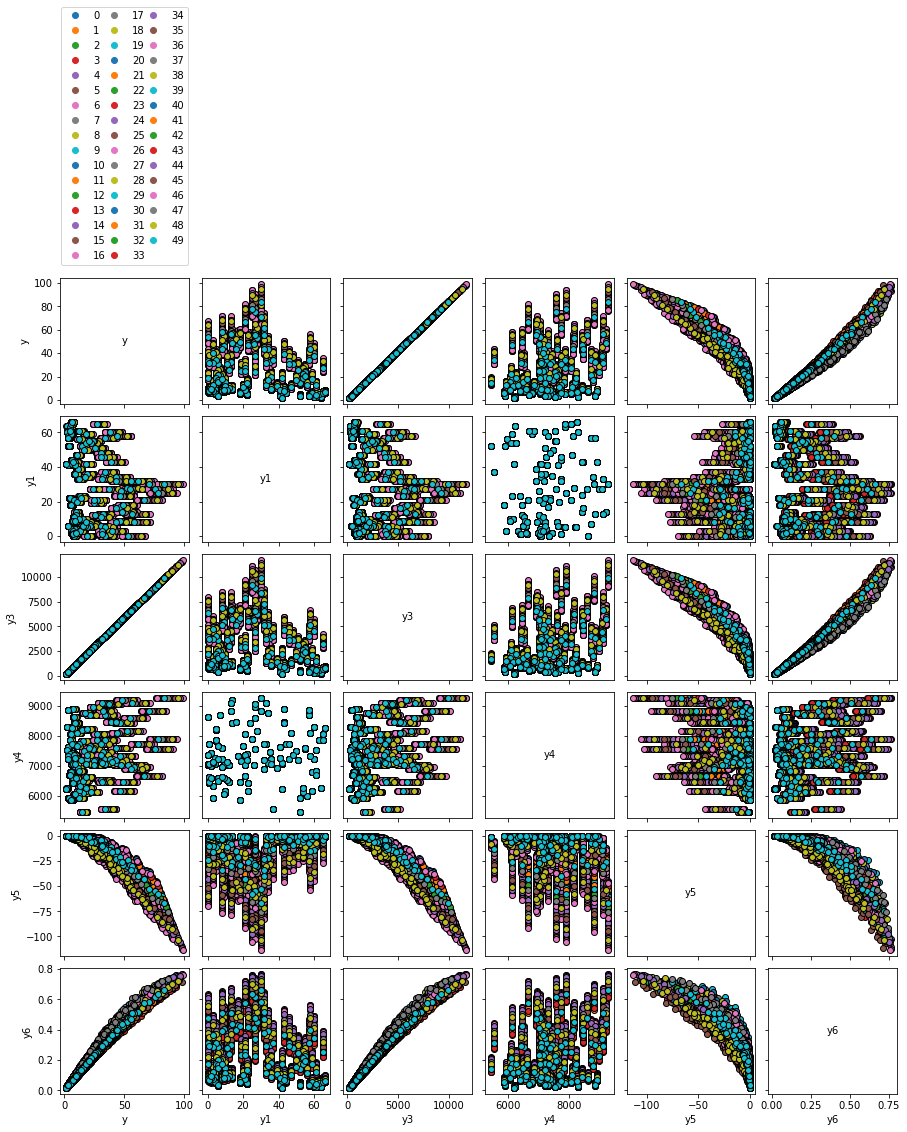

In [6]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15, 15)
fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3\SA_All.svg', format='svg', dpi=600)
plt.show()

### Address of outputs

In [16]:
import tarfile

rootVisualization = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3'
with tarfile.open(os.path.join(rootVisualization, '6000_runs.tar.gz'),"r") as zip_ref:
    zip_ref.extractall(os.path.join(rootVisualization, '6000_runs'))

# We have five types of outputs
outDaily = os.path.join(rootVisualization, 'Outputs_py')
outSeasonTippingPoint = os.path.join(rootVisualization, 'outSeason')
outSeason_Likelihood_survival = os.path.join(rootVisualization, 'outSeason_Likelihood_survival')
outSeasonArtificialSnowPossibility = os.path.join(rootVisualization, 'outSeasonArt')
outSeasonFinancial = os.path.join(rootVisualization, 'outSeasonFinancial')
out_ema = os.path.join(rootVisualization, '6000_runs')

In [17]:
df4_ema_experiment = pd.read_csv(os.path.join(out_ema, 'experiments.csv'))

df4_ema_y = pd.read_csv(os.path.join(out_ema, 'y.csv'), header=None)
df4_ema_y.columns = ["Yout"]
df4_ema_y1 = pd.read_csv(os.path.join(out_ema, 'y1.csv'), header=None)
df4_ema_y1.columns = ["Yout1"]
df4_ema_y3 = pd.read_csv(os.path.join(out_ema, 'y3.csv'), header=None)
df4_ema_y3.columns = ["Yout3"]
df4_ema_y4 = pd.read_csv(os.path.join(out_ema, 'y4.csv'), header=None)
df4_ema_y4.columns = ["Yout4"]
df4_ema_y5 = pd.read_csv(os.path.join(out_ema, 'y5.csv'), header=None)
df4_ema_y5.columns = ["Yout5"]
df4_ema_y6 = pd.read_csv(os.path.join(out_ema, 'y6.csv'), header=None)
df4_ema_y6.columns = ["Yout6"]

In [18]:
df_final_ema = pd.concat((df4_ema_experiment, df4_ema_y, df4_ema_y1, df4_ema_y3, df4_ema_y4, df4_ema_y5, df4_ema_y6 ), axis = 1)

In [19]:
df_final_ema

X2fM       X3iPot    X5temp  X6tempArt  xClimateModel      xRCP  \
0     1.083500   958.628388  4.689998  -1.303146       0.234322  3.280194   
1     1.055649  1066.862014  4.808869  -1.249891       0.683158  2.846338   
2     1.442488   964.303333  1.080408  -1.050969       0.118604  0.817280   
3     1.609705  1014.581610  3.780008  -1.218713       0.984555  2.173282   
4     1.601943   928.567132  5.713645  -1.299085       0.860960  0.566171   
...        ...          ...       ...        ...            ...       ...   
5995  1.366276  1084.914735  5.683929  -1.095031       0.307970  0.961036   
5996  1.075614  1074.983561  1.822987  -1.877957       0.174540  0.849997   
5997  1.128261  1023.794567  2.337568  -1.202803       0.443087  2.028878   
5998  1.114805   970.365350  5.335165  -1.710883       0.839824  1.901646   
5999  1.429578  1032.935387  3.951121  -1.558650       0.603592  2.609853   

      x1SnowThershold  xGoodDays  scenario  policy     model       Yout  \
0          280.880394  85.772186         0       0  UZHModel  36.894089   
1          280.880394  85.772186         1       0  UZHModel  31.863991   
2          280.880394  85.772186         2       0  UZHModel   7.433280   
3          280.880394  85.772186         3       0  UZHModel  18.173751   
4          280.880394  85.772186         4       0  UZHModel  43.707769   
...               ...        ...       ...     ...       ...        ...   
5995       264.545747  90.363579       115      49  UZHModel  40.230466   
5996       264.545747  90.363579       116      49  UZHModel   9.741874   
5997       264.545747  90.363579       117      49  UZHModel  14.309221   
5998       264.545747  90.363579       118      49  UZHModel  55.703865   
5999       264.545747  90.363579       119      49  UZHModel  20.512495   

      Yout1        Yout3    Yout4  Yout5     Yout6  
0        43  4353.502506  8447.71  -6.99  0.360601  
1        57  3759.950953  8706.05  -4.06  0.310800  
2         1   877.127044  7727.13   0.00  0.073443  
3        36  2144.502636  7226.89  -1.73  0.179444  
4         9  5157.516700  7020.04 -15.36  0.403298  
...     ...          ...      ...    ...       ...  
5995      3  4747.194997  7137.04 -16.14  0.362757  
5996      2  1149.541143  6592.98  -0.27  0.091362  
5997     22  1688.488043  7194.89  -1.21  0.134196  
5998     32  6573.056115  6905.81 -34.12  0.472761  
5999     55  2420.474410  7581.38  -1.23  0.192373  

[6000 rows x 17 columns]

In [20]:
# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values



YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values

In [21]:
#outFolder = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3'
outFolder = rootVisualization

In [22]:
outSeasonFolder = os.path.join(outFolder, 'outSeason')

In [23]:
#### 2020/07/22 ####
all_Files = []
for filename in os.walk(outSeasonFolder):
    all_Files = filename[2]
    
totalFiles_loc = []
for i in range(len(all_Files)):
    totalFiles_loc.append(os.path.join(outSeasonFolder, all_Files[i]))

### Total number of outputs

In [24]:
len(totalFiles_loc)

6000

In [25]:
emptyMatrixGoodDays = [np.empty([119, 69]) for _ in range(len(totalFiles_loc))]
    
for i in range(0, len(totalFiles_loc), 1):
    b = []
    with open(totalFiles_loc[i], 'r') as file:
        outputReaderlines = file.readlines()
        for j in range (len(outputReaderlines)):
            b.append(outputReaderlines[j].replace('\n','').split(','))
    
    emptyMatrixGoodDays[i] = np.array(b)

In [26]:
#matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=2)
matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=0)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [27]:
matrix_GoodDays.shape

(6000, 119, 2)

In [28]:
emptyMatrixGoodDays[1][0,1]

'isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp'

In [29]:
matrix_GoodDays26= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP26' in emptyMatrixGoodDays[i][0,1]) , axis=0) 

matrix_GoodDays45= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP45' in emptyMatrixGoodDays[i][0,1]) , axis=0) 

matrix_GoodDays85= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP85' in emptyMatrixGoodDays[i][0,1]) , axis=0) 

In [30]:
matrix_GoodDays26.shape

(1150, 119, 2)

In [31]:
matrix_GoodDays45.shape

(1950, 119, 2)

In [32]:
matrix_GoodDays85.shape

(2900, 119, 2)

In [33]:
print(type(matrix_GoodDays))
print(matrix_GoodDays.ndim)
print(len(matrix_GoodDays))
print(matrix_GoodDays.size)
print(matrix_GoodDays.dtype)
print(matrix_GoodDays.dtype.name)

<class 'numpy.ndarray'>
3
6000
1428000
<U47
str1504


### Calculate the quantiles for each year of simulation (1981-2100)

In [34]:
matrix_GoodDays[2, 1:, 1:2].shape

(118, 1)

In [35]:
q10_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.9, axis=0)

In [36]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

[3.11539525]
[5.76250131]
[17.7460576]
[39.62757143]
[60.75898798]
(118, 1)


In [37]:
a22 =  matrix_GoodDays[3100, 1:, 1:2].astype(float)

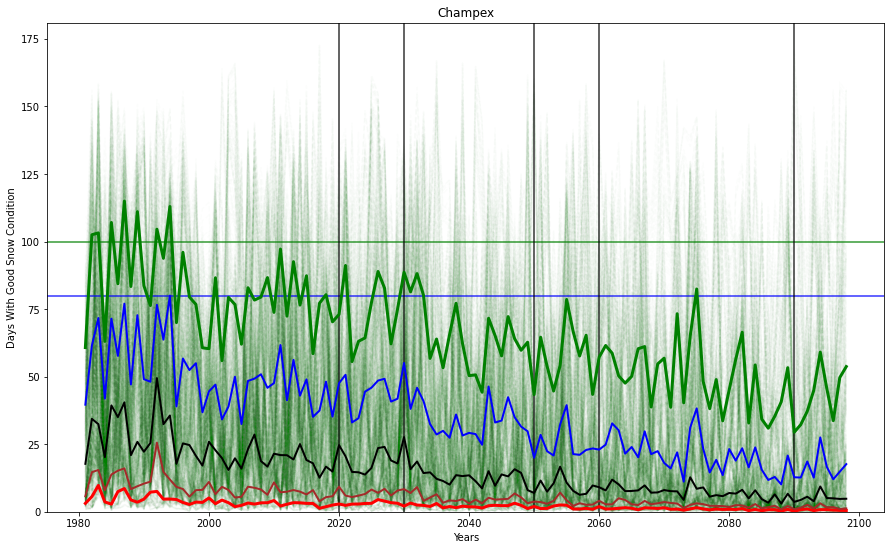

In [40]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 6000, 5):
    a = matrix_GoodDays[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years, color='red', linewidth = 3, alpha=1)
plt.plot(x_axis, q25_years, color='brown',linewidth = 2, alpha=1)
plt.plot(x_axis, q50_years, color='black', linewidth = 2, alpha=1)
plt.plot(x_axis, q75_years, color='blue', linewidth = 2, alpha=1)
plt.plot(x_axis, q90_years, color='green', linewidth = 3, alpha=1)


axs.set_ylim(bottom=0, top =181)
axs.set_title('Champex')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP_All.svg'), format='svg', dpi=300)

plt.show()

In [41]:
experiments, outcomes = load_results(fh)
print(experiments.shape)
print(list(outcomes.keys()))

[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\CHrandomness_3\6000_runs.tar.gz


(6000, 11)
['y', 'y1', 'y3', 'y4', 'y5', 'y6']


### Visualization with ema-workbench - part2 

In [43]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['y'] < 50
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 6000 points remaining, containing 5179 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting 

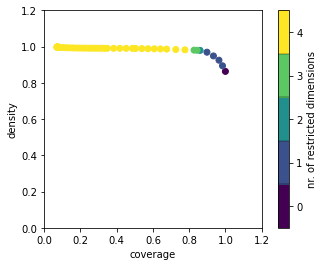

In [44]:
box1.show_tradeoff()

plt.show()

coverage    0.898243
density     0.969167
id                 4
mass             0.8
mean        0.969167
res_dim            1
Name: 4, dtype: object

           box 4                                          
             min       max                       qp values
X5temp  0.015961  4.803042  [-1.0, 2.440410334622072e-140]



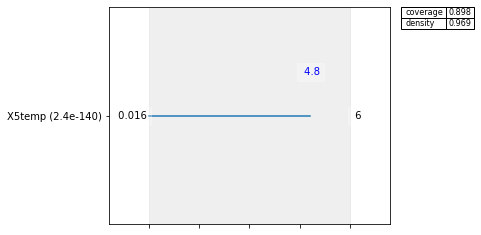

In [45]:
box1.inspect(4)
box1.inspect(4, style='graph')
plt.show()

policy [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 17]


C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


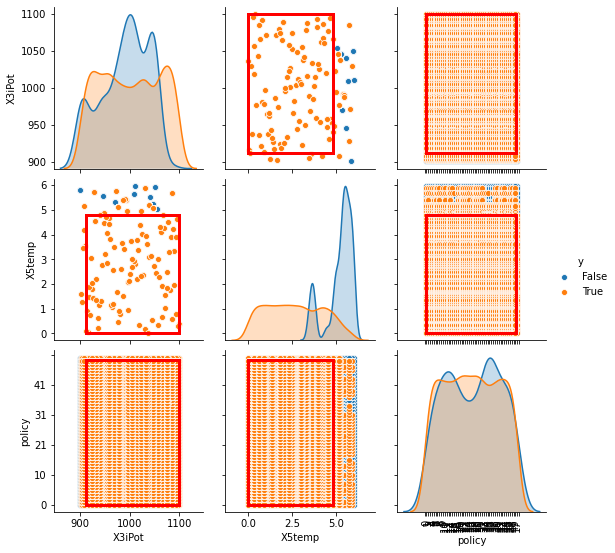

In [48]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(6)
plt.show()

### Visualization with ema-workbench - part3

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\feature_scoring.py:307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees.fit(x, y)
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


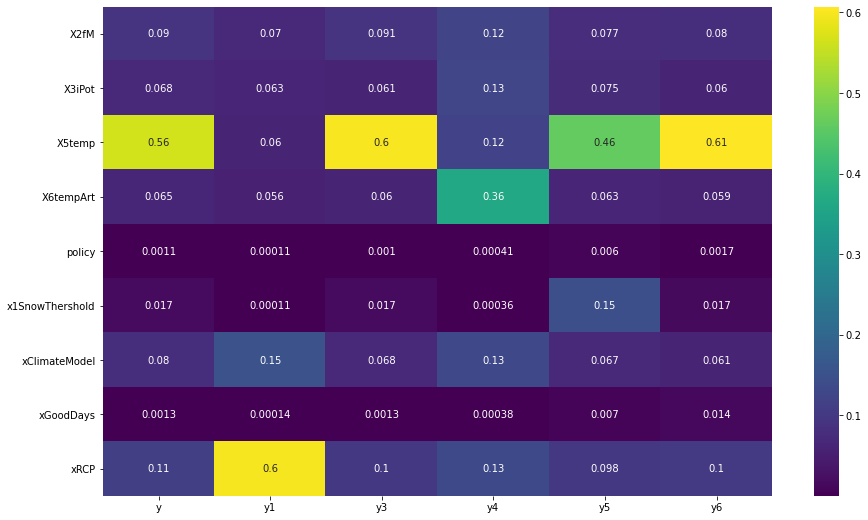

In [50]:
from ema_workbench.analysis import feature_scoring

fig, ax = plt.subplots(figsize=(15,9))

x = experiments
Y = outcomes

fs = feature_scoring.get_feature_scores_all(x, Y)
ax = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [51]:
x = experiments
Y = outcomes['y'] < 50
#fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.CLASSIFICATION)
fs, alg = feature_scoring.get_ex_feature_scores(x, Y)

fs.sort_values(ascending=False, by=1)

[MainProcess/INFO] model dropped from analysis because only a single category


1
0                        
X5temp           0.377991
xRCP             0.130611
X2fM             0.116458
xClimateModel    0.096620
X6tempArt        0.089236
X3iPot           0.084088
x1SnowThershold  0.083986
policy           0.012078
xGoodDays        0.008931

[MainProcess/INFO] model dropped from analysis because only a single category


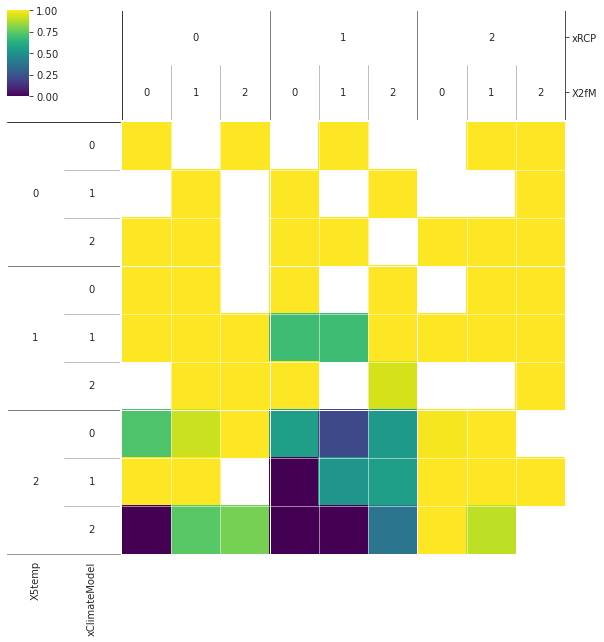

In [53]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y'] < 50
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

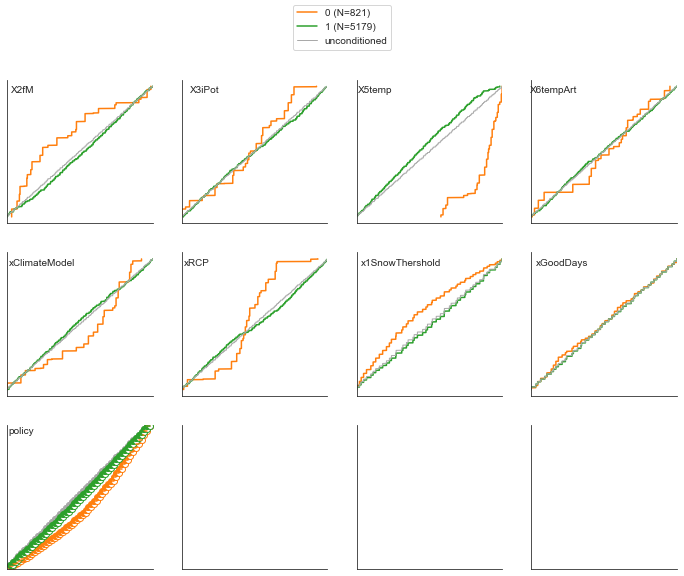

In [54]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y'] < 50
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

### Scatter Plots (Inputs vs Outputs)

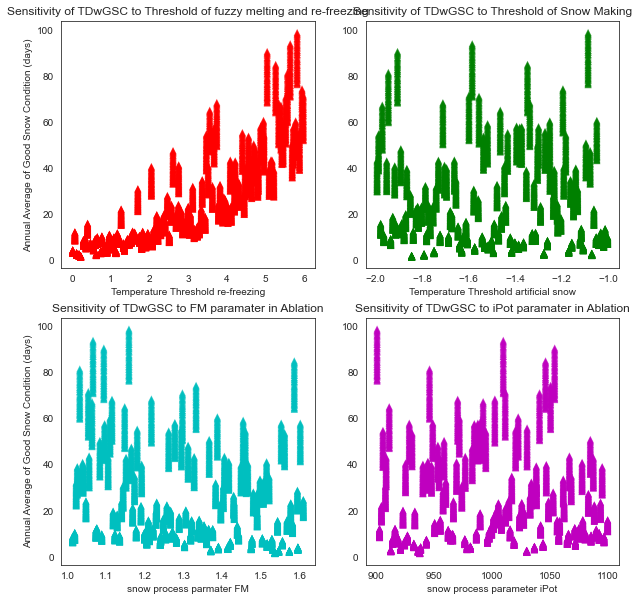

In [55]:
#fig, (ax1, ax2) = plt.subplots(1,2)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
#axs[0,0].scatter(xGoodDays, y, s = 200, c='b' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Good Days Condition')

#axs[0,1].scatter(x1SnowThershold, y, s = 200, c='orange' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Snow Threshold Condition')

axs[0,0].scatter(x5, YY, s = 50, c='r' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[0,1].scatter(x6, YY, s = 50, c='g' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')

axs[1,0].scatter(x2, YY, s = 50, c='c' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[1,1].scatter(x3, YY, s = 50, c='m' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')


# produce a legend with the unique colors from the scatter
#axs[0,0].set_xlabel("Good Days Condition")
#axs[0,1].set_xlabel("Snow Threshold Condition")
axs[0,0].set_xlabel("Temperature Threshold re-freezing")
axs[0,1].set_xlabel("Temperature Threshold artificial snow")
axs[1,0].set_xlabel("snow process parmater FM")
axs[1,1].set_xlabel("snow process parameter iPot")


axs[0,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[1,1].set_ylabel("Frequency of Tipping points")
#axs[2,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[2,1].set_ylabel("Frequency of Tipping points")

#axs[0,0].set_title('Sensitivity of TDwGSC to Policy-1 (less that 100 days)')
#axs[0,1].set_title('Sensitivity of TDwGSC to Policy-2 (300 mm)')
axs[0,0].set_title('Sensitivity of TDwGSC to Threshold of fuzzy melting and re-freezing')
axs[0,1].set_title('Sensitivity of TDwGSC to Threshold of Snow Making')
axs[1,0].set_title('Sensitivity of TDwGSC to FM paramater in Ablation')
axs[1,1].set_title('Sensitivity of TDwGSC to iPot paramater in Ablation')


#axs[0,0].text(0, 130, r'A', fontsize=15)
#axs[0,1].text(-1.9, 130, r'B', fontsize=15)
#axs[1,0].text(1.04, 130, r'C', fontsize=15)
#axs[1,1].text(920, 130, r'D', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'SA_All.svg'), format='svg', dpi=300)

plt.show()


## 3D Scatter Plot

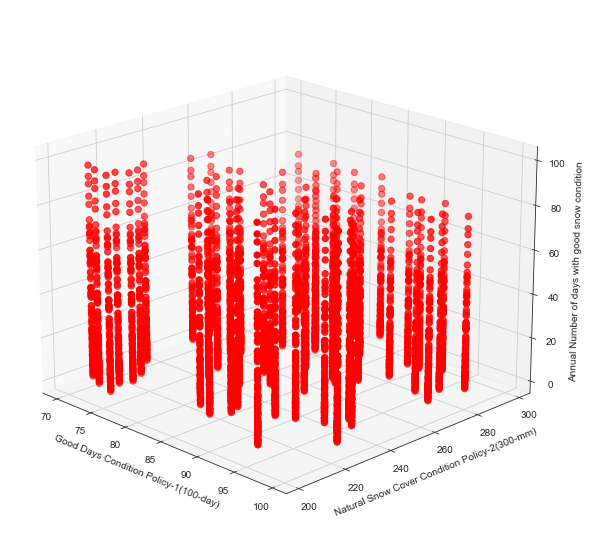

In [56]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xGoodDays, x1SnowThershold, YY, s = 40, c='r', marker='o')

ax.set_xlabel('Good Days Condition Policy-1(100-day)')
ax.set_ylabel('Natural Snow Cover Condition Policy-2(300-mm)')
ax.set_zlabel('Annual Number of days with good snow condition')


#ax.scatter(100, 300, 40, color='green')


#x = np.linspace(75,100,5)
#y = np.linspace(220,300,16)
#X,Y = np.meshgrid(x,y)
#Z= X + Y -X - Y + 40 
#surf = ax.plot_surface(X, Y, Z, alpha = 0.2)
ax.view_init(20, -45)

fig.savefig(os.path.join(rootVisualization, 'SA_Policy_All.svg'), format='svg', dpi=300)
plt.show()

### Defining the Q0.9 and Q0.1 databases

In [57]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

[3.11539525]
[5.76250131]
[17.7460576]
[39.62757143]
[60.75898798]
(118, 1)


In [58]:
matrix_GoodDays[:, :, 1:2].shape

(6000, 119, 1)

In [59]:
matrix_GoodDays[600, 0, 1:2]

array(['isOverSnow_CLMCOM-CCLM4-MPIESM-EUR11-RCP85-pcp'], dtype='<U47')

In [60]:
matrix_GoodDays[3333].shape

(119, 2)

## Analysis for different RCP2.6, RCP4.5, and RCP8.5

In [61]:
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(matrix_GoodDays.shape)    

(1150, 119, 2)
(1950, 119, 2)
(2900, 119, 2)
(6000, 119, 2)


In [62]:
q10_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.9, axis=0)


In [64]:
dfq50_26 = pd.DataFrame(q50_years_26)
dfq50_26.columns = ['median26']
dfq50_45 = pd.DataFrame(q50_years_45)
dfq50_45.columns = ['median45']
dfq50_85 = pd.DataFrame(q50_years_85)
dfq50_85.columns = ['median85']


dfq90_26 = pd.DataFrame(q90_years_26)
dfq90_26.columns = ['Q90_26']
dfq90_45 = pd.DataFrame(q90_years_45)
dfq90_45.columns = ['Q90_45']
dfq90_85 = pd.DataFrame(q90_years_85)
dfq90_85.columns = ['Q90_85']


dfq10_26 = pd.DataFrame(q10_years_26)
dfq10_26.columns = ['Q10_26']
dfq10_45 = pd.DataFrame(q10_years_45)
dfq10_45.columns = ['Q10_45']
dfq10_85 = pd.DataFrame(q10_years_85)
dfq10_85.columns = ['Q10_85']

In [65]:
dfq50_26.head()

median26
0  29.417046
1  38.874566
2  38.050234
3  21.927488
4  54.857671

In [66]:
dfAllAverages = pd.concat((dfq50_26, dfq50_45, dfq50_85), axis=1)
dfAllAverages_Q90 = pd.concat((dfq90_26, dfq90_45, dfq90_85), axis=1)
dfAllAverages_Q10 = pd.concat((dfq10_26, dfq10_45, dfq10_85), axis=1)


In [67]:
dfAllAverages.head()

median26   median45   median85
0  29.417046  15.283146  15.230058
1  38.874566  33.791092  31.779059
2  38.050234  31.248741  32.468861
3  21.927488  19.099233  19.920049
4  54.857671  33.523689  38.519753

In [68]:
print('*** All RCPs***')
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)
print('*** RCP2.6***')
print(q10_years_26[0])
print(q25_years_26[0])
print(q50_years_26[0])
print(q75_years_26[0])
print(q90_years_26[0])
print(q50_years_26.shape)
print('*** RCP4.5***')
print(q10_years_45[0])
print(q25_years_45[0])
print(q50_years_45[0])
print(q75_years_45[0])
print(q90_years_45[0])
print(q50_years_45.shape)
print('*** RCP8.5***')
print(q10_years_85[0])
print(q25_years_85[0])
print(q50_years_85[0])
print(q75_years_85[0])
print(q90_years_85[0])
print(q50_years_85.shape)


*** All RCPs***
[3.11539525]
[5.76250131]
[17.7460576]
[39.62757143]
[60.75898798]
(118, 1)
*** RCP2.6***
[4.6050581]
[6.02994441]
[29.4170459]
[44.376229]
[65.8660927]
(118, 1)
*** RCP4.5***
[2.63378847]
[5.11318759]
[15.28314632]
[35.68470353]
[49.25389376]
(118, 1)
*** RCP8.5***
[2.58649684]
[6.42574775]
[15.2300578]
[40.7714626]
[63.65693217]
(118, 1)


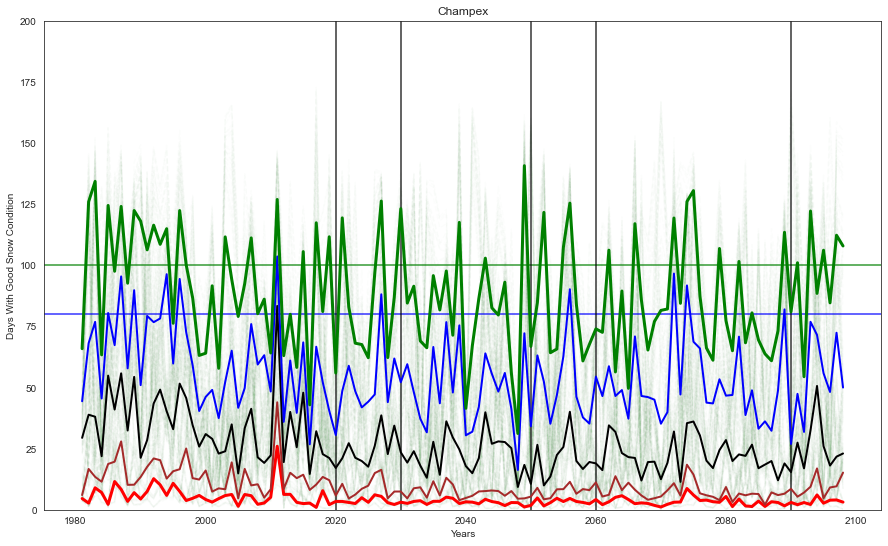

In [70]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 1150, 5):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_26, color='red', linewidth = 3, alpha=1)
plt.plot(x_axis, q25_years_26, color='brown',linewidth = 2, alpha=1)
plt.plot(x_axis, q50_years_26, color='black', linewidth = 2, alpha=1)
plt.plot(x_axis, q75_years_26, color='blue', linewidth = 2, alpha=1)
plt.plot(x_axis, q90_years_26, color='green', linewidth = 3, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Champex')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP26.svg'), format='svg', dpi=300)


plt.show()

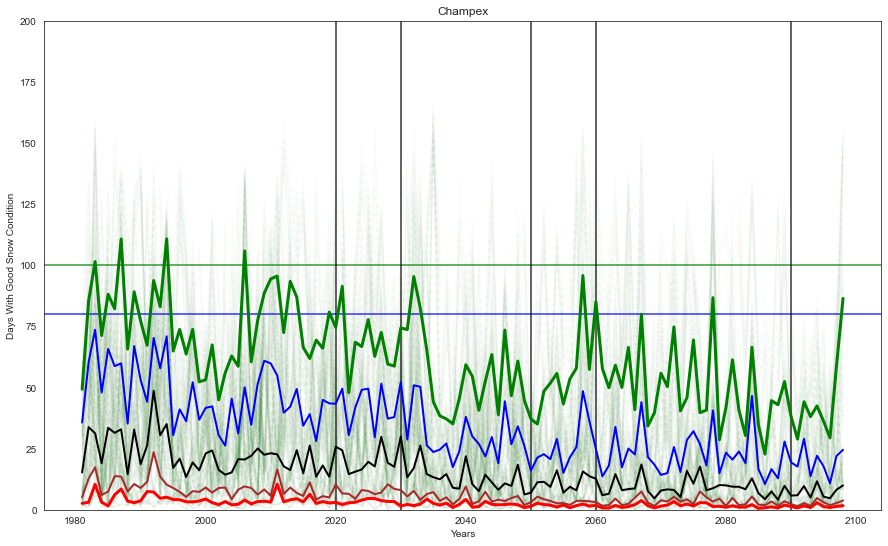

In [71]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 1950, 5):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_45, color='red', linewidth = 3, alpha=1)
plt.plot(x_axis, q25_years_45, color='brown',linewidth = 2, alpha=1)
plt.plot(x_axis, q50_years_45, color='black', linewidth = 2, alpha=1)
plt.plot(x_axis, q75_years_45, color='blue', linewidth = 2, alpha=1)
plt.plot(x_axis, q90_years_45, color='green', linewidth = 3, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Champex')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

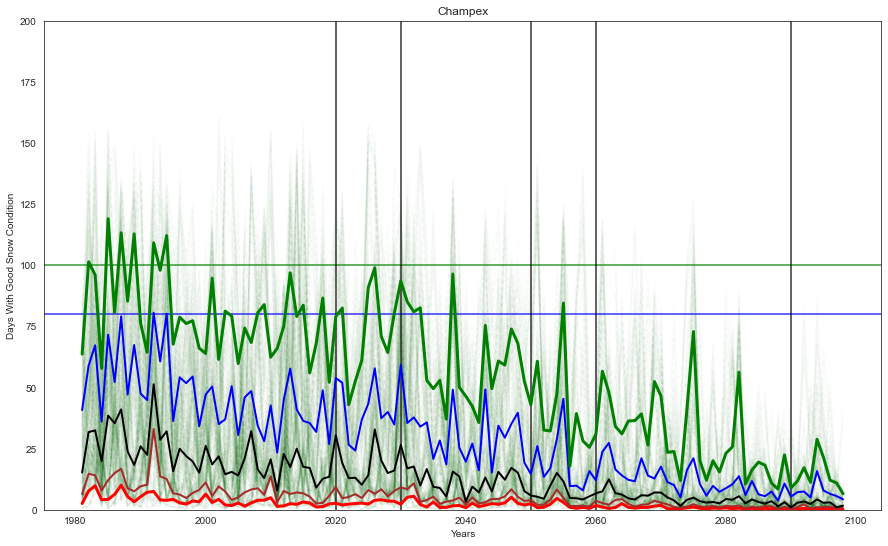

In [72]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 2900, 5):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_85, color='red', linewidth = 3, alpha=1)
plt.plot(x_axis, q25_years_85, color='brown',linewidth = 2, alpha=1)
plt.plot(x_axis, q50_years_85, color='black', linewidth = 2, alpha=1)
plt.plot(x_axis, q75_years_85, color='blue', linewidth = 2, alpha=1)
plt.plot(x_axis, q90_years_85, color='green', linewidth = 3, alpha=1)


axs.set_ylim(bottom=0, top =200)
axs.set_title('Champex')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

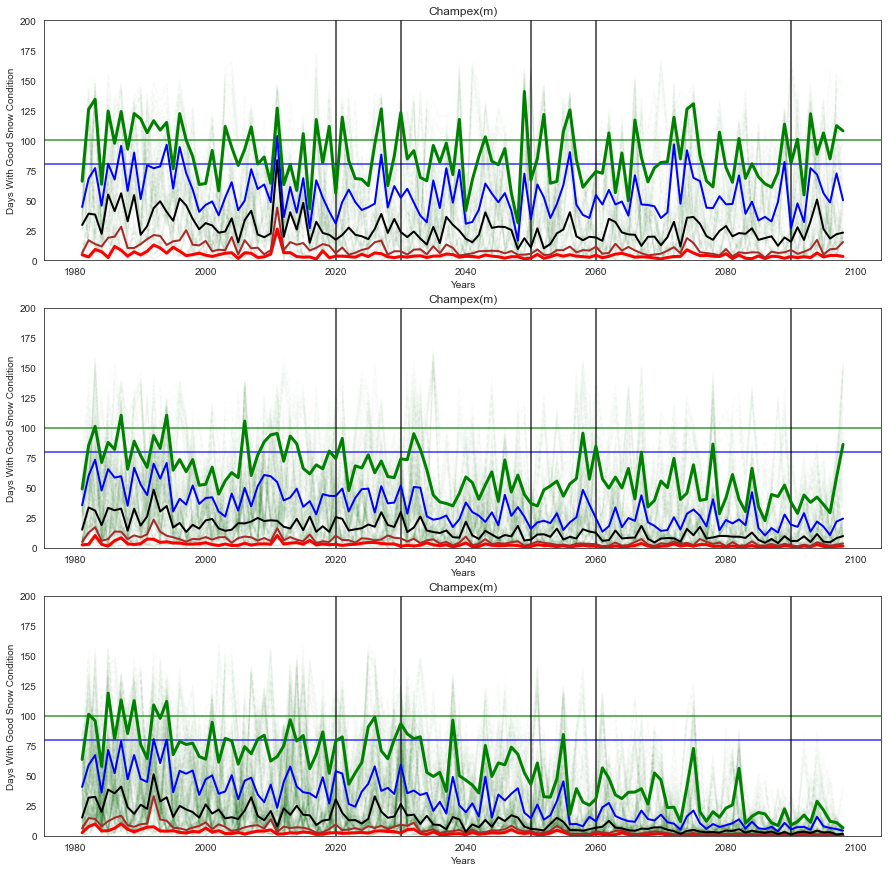

In [74]:
fig, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 1150, 5):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


for i in range(0, 1950, 5):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


for i in range(0, 2900, 5):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)    


axs[0].axhline(y=100, color='green', alpha=0.8)
axs[0].axhline(y=80, color='blue', alpha=0.8)
axs[1].axhline(y=100, color='green', alpha=0.8)
axs[1].axhline(y=80, color='blue', alpha=0.8)
axs[2].axhline(y=100, color='green', alpha=0.8)
axs[2].axhline(y=80, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='black', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='black', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='black', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_26, color='red', linewidth = 3, alpha=1)
axs[0].plot(x_axis, q25_years_26, color='brown',linewidth = 2, alpha=1)
axs[0].plot(x_axis, q50_years_26, color='black', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q75_years_26, color='blue', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q90_years_26, color='green', linewidth = 3, alpha=1)
axs[1].plot(x_axis, q10_years_45, color='red', linewidth = 3, alpha=1)
axs[1].plot(x_axis, q25_years_45, color='brown',linewidth = 2, alpha=1)
axs[1].plot(x_axis, q50_years_45, color='black', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q75_years_45, color='blue', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q90_years_45, color='green', linewidth = 3, alpha=1)
axs[2].plot(x_axis, q10_years_85, color='red', linewidth = 3, alpha=1)
axs[2].plot(x_axis, q25_years_85, color='brown',linewidth = 2, alpha=1)
axs[2].plot(x_axis, q50_years_85, color='black', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q75_years_85, color='blue', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q90_years_85, color='green', linewidth = 3, alpha=1)

axs[0].set_ylim(bottom=0, top =200)
axs[0].set_title('Champex(m)')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Days With Good Snow Condition')

axs[1].set_ylim(bottom=0, top =200)
axs[1].set_title('Champex(m)')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Days With Good Snow Condition')

axs[2].set_ylim(bottom=0, top =200)
axs[2].set_title('Champex(m)')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Days With Good Snow Condition')


fig.savefig(os.path.join(rootVisualization, 'RCP26_45_85.svg'), format='svg', dpi=300)

plt.show()

In [75]:
dfAllAverages.head()

median26   median45   median85
0  29.417046  15.283146  15.230058
1  38.874566  33.791092  31.779059
2  38.050234  31.248741  32.468861
3  21.927488  19.099233  19.920049
4  54.857671  33.523689  38.519753

In [76]:
y_axis = np.arange(1981, 2100, step= 20)

### Worst Case: Quantile 0.10 >> 90% of the scenarios satisfy this condition

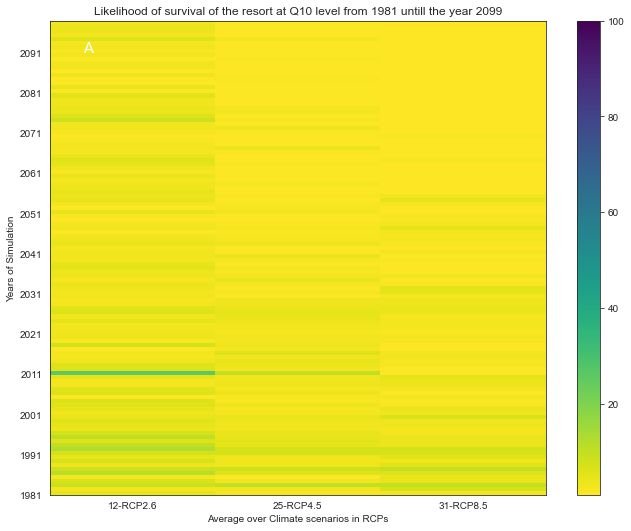

In [77]:
from matplotlib.ticker import FuncFormatter


fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c3 = ax3.pcolor(dfAllAverages_Q10, cmap='viridis_r', vmin=1, vmax=100)
cb3 = fig.colorbar(c3)

#xticks(np.arange(0, 4, step=1))
ax3.set_title('default: no edges')


ax3.set_xlabel("Average over Climate scenarios in RCPs")

ax3.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('12-RCP2.6', '25-RCP4.5', '31-RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099))

ax3.text(0.2, 110, 'A', color = 'white', fontsize=15)

fig.savefig(os.path.join(rootVisualization, 'Likelihood_All.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Median Case: Quantile 0.5 >> 50 % of the scenarios satisfy this condition

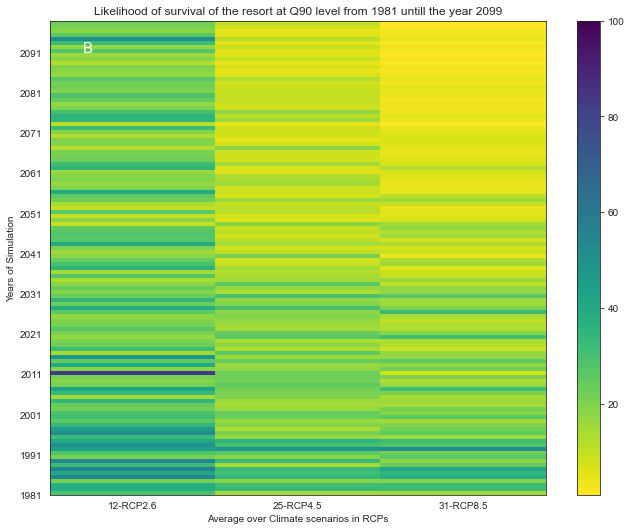

In [78]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('12-RCP2.6', '25-RCP4.5', '31-RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'B', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Best Case: Quantile 0.9 >> Only 10 % of the scenarios satisfy this condition

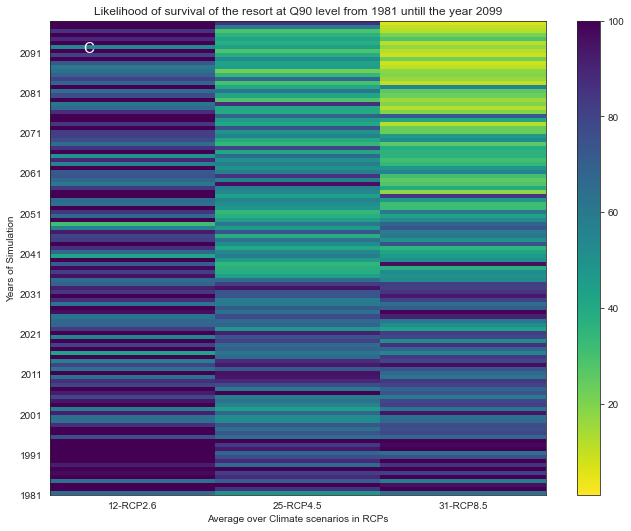

In [79]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages_Q90, cmap='viridis_r' ,vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('12-RCP2.6', '25-RCP4.5', '31-RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'C', color = 'white', fontsize=15)


fig.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)


fig.tight_layout()
plt.show()

### Making dataframes for all RCP2.6 , RCP4.5, and RCP8.5 scenarios

In [80]:
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(matrix_GoodDays.shape)

(1150, 119, 2)
(1950, 119, 2)
(2900, 119, 2)
(6000, 119, 2)


In [81]:
pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1]).head()

Season
0  1981-1982
1  1982-1983
2  1983-1984
3  1984-1985
4  1985-1986

In [82]:
df26_all = pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1])
for i in range(1150):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays26[i,0,1:])])
    df26_all = pd.concat((df26_all, b), axis = 1)

In [83]:
df26_all.head(10)

Season sc_1_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0  1981-1982                                 49.333738760341504     
1  1982-1983                                 109.72649075899479     
2  1983-1984                                 22.596771176087255     
3  1984-1985                                 14.556017727053732     
4  1985-1986                                 15.503858891166125     
5  1986-1987                                  49.64055974792071     
6  1987-1988                                 28.523386323377075     
7  1988-1989                                 29.115844904753903     
8  1989-1990                                  20.81024562993694     
9  1990-1991                                  27.90864067560153     

  sc_2_['isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp']  \
0                                 51.948232383440235   
1                                  55.18192194712576   
2                                  54.29364350199923   
3                                  58.57966710500545   
4                                 16.764359827026066   
5                                  102.8386123644739   
6                                 102.24909654670597   
7                                  75.59694597308072   
8                                 29.731694225146697   
9                                  32.30022522409076   

  sc_3_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  6.340623457913726    
1                                 3.2266527550222457    
2                                  10.31435383404728    
3                                 13.660133879201542    
4                                 15.413107080073168    
5                                  16.04969490687727    
6                                  6.597950681242696    
7                                  2.407537541828887    
8                                  32.00696422391343    
9                                 13.027141355228068    

  sc_4_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  86.22402487492619    
1                                 11.223702379258192    
2                                 24.342743182449738    
3                                  62.42002547463247    
4                                  71.20291183830017    
5                                  42.01576116251353    
6                                 50.293902084885815    
7                                  44.95702579406527    
8                                  68.61731911604208    
9                                   31.0826206351894    

  sc_5_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  86.84366176739887      
1                                 134.79437662395526      
2                                   94.8786972349895      
3                                  60.56081545963133      
4                                 155.24360170515584      
5                                   95.9020284525472      
6                                 112.36454739804361      
7                                 100.89976245806369      
8                                  87.20643779541334      
9                                 38.762713623295724      

  sc_6_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp']  \
0                                  37.05783745572006       
1                                  97.47846608854309       
2                                  74.04927654269613       
3                                 103.42683426709448       
4                                  74.19748909448222       
5                                  59.65361176621764       
6                                  67.94497010403853       
7                                  53.54706237998304       
8                                  83.44439836034908       
9                                  20.73772365828474       

  sc_7_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0

In [84]:
matrix_GoodDays45[2,0,1:]

array(['isOverSnow_DMI-HIRHAM-ECEARTH-EUR44-RCP45-pcp'], dtype='<U47')

In [85]:
df45_all = pd.DataFrame((matrix_GoodDays45[0][1:,0:1]), columns=matrix_GoodDays45[0,0,0:1])
for i in range(1950):
    #b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=matrix_GoodDays45[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays45[i,0,1:])])

    df45_all = pd.concat((df45_all, b), axis = 1)

In [86]:
df45_all.head(10)

Season sc_1_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0  1981-1982                                 25.455995301462526        
1  1982-1983                                 5.5807739923415784        
2  1983-1984                                 30.013486765955353        
3  1984-1985                                 27.035600033060696        
4  1985-1986                                  69.08168590747965        
5  1986-1987                                  24.46863553718619        
6  1987-1988                                  29.49315853046335        
7  1988-1989                                  68.61137475076713        
8  1989-1990                                  76.12834653708705        
9  1990-1991                                 38.379645625347855        

  sc_2_['isOverSnow_SMHI-RCA-MPIESM-EUR11-RCP45-pcp']  \
0                                  2.011133482173543    
1                                  1.377307900227114    
2                                  6.889740197557951    
3                                 1.6626083333846537    
4                                 1.7771318820872044    
5                                 1.3673550497081701    
6                                 2.7213373266926517    
7                                 2.0342398796338212    
8                                  7.871740167041503    
9                                  3.473500985954618    

  sc_3_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR44-RCP45-pcp']  \
0                                 35.003649133244686       
1                                  93.61987091700261       
2                                  77.97681313246152       
3                                   52.9561361406554       
4                                  81.22253853054865       
5                                  45.91657704343561       
6                                  37.74712826395524       
7                                  45.86207751394203       
8                                  79.31974721084046       
9                                  49.49578870164214       

  sc_4_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP45-pcp']  \
0                                 2.5980009015394057      
1                                  29.90208979720467      
2                                 18.156586210783725      
3                                  3.804268846372703      
4                                   17.4705410474802      
5                                  9.968941691367847      
6                                  23.24582505785539      
7                                  2.879881412492198      
8                                  4.155600085175743      
9                                 2.2638569640730446      

  sc_5_['isOverSnow_SMHI-RCA-GFDL-EUR44-RCP45-pcp']  \
0                                31.254888254964403   
1                                 96.61823908350283   
2                                 42.91042158030662   
3                                 54.48155297944192   
4                                   79.393713208982   
5                                 70.10178457868467   
6                                51.302209148252004   
7                                 65.70152852040009   
8                                 64.26516119440637   
9                                21.492281869949622   

  sc_6_['isOverSnow_SMHI-RCA-MPIESM-EUR11-RCP45-pcp']  \
0                                 19.116882827814088    
1                                  55.90792360976024    
2                                 110.74226824927447    
3                                 14.249018175765086    
4                                    79.772579206049    
5                                 38.785644640129995    
6                                 120.50763964416979    
7                                  37.84415759522586    
8                                  86.81064756794865    
9                                  73.73475039872463    

  sc_7_['isOverSnow_CLMCOM-CCLM4-HADGEM-

In [87]:
df85_all = pd.DataFrame((matrix_GoodDays85[0][1:,0:1]), columns=matrix_GoodDays85[0,0,0:1])
for i in range(2900):
    #b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=matrix_GoodDays85[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays85[i,0,1:])])

    df85_all = pd.concat((df85_all, b), axis = 1)

In [88]:
df85_all.head(10)

Season sc_1_['isOverSnow_CLMCOM-CCLM5-ECEARTH-EUR44-RCP85-pcp']  \
0  1981-1982                                  4.328746413994263         
1  1982-1983                                 22.828506823354953         
2  1983-1984                                 12.062607670763624         
3  1984-1985                                  20.01229032770763         
4  1985-1986                                 3.9909513884487446         
5  1986-1987                                 33.496962364551024         
6  1987-1988                                 18.435569385851117         
7  1988-1989                                 3.9148335802050327         
8  1989-1990                                   17.7628631245018         
9  1990-1991                                 19.492033296900644         

  sc_2_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR44-RCP85-pcp']  \
0                                  47.68178304296271       
1                                    97.638704005492       
2                                  94.80682028905515       
3                                  65.86432558637733       
4                                   89.6187544592976       
5                                  57.64353412866929       
6                                 46.528874653554794       
7                                  45.80915641008137       
8                                  86.22848829900101       
9                                 58.325633227890336       

  sc_3_['isOverSnow_CLMCOM-CCLM5-HADGEM-EUR44-RCP85-pcp']  \
0                                  18.67220525088404        
1                                  43.02779506417976        
2                                 44.270849095292334        
3                                  9.393342477215054        
4                                  76.09156546965671        
5                                 16.799710153472155        
6                                  45.35057991854998        
7                                 12.990881410826459        
8                                 3.4137838828409577        
9                                 13.321693116401029        

  sc_4_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP85-pcp']  \
0                                 2.5974747596617562     
1                                  16.66554397467054     
2                                  35.23225777908508     
3                                 21.739612397603178     
4                                 1.1407632810654524     
5                                  23.86342793190754     
6                                 44.185657956268976     
7                                 10.412084687821404     
8                                 12.881531590587493     
9                                  7.447932884591717     

  sc_5_['isOverSnow_SMHI-RCA-ECEARTH-EUR11-RCP85-pcp']  \
0                                 1.0420678338489737     
1                                 1.4468901635467712     
2                                  8.353466901189643     
3                                 10.349298423754764     
4                                 0.5428030371123947     
5                                 3.3605558628850245     
6                                  22.14855617200925     
7                                 1.4769679408859542     
8                                  6.167303554383411     
9                                 0.9609981395338829     

  sc_6_['isOverSnow_CLMCOM-CCLM4-HADGEM-EUR11-RCP85-pcp']  \
0                                   36.0961825827215        
1                                  80.46232649542748        
2                                  46.17940681806625        
3                                 20.858166382928523        
4                                 117.65629698100142        
5                                 114.42379262244594        
6                                  77.36100644111993        
7                                  51.03150766666414        
8                                  17.3221

In [89]:
df26_all_Matrix = df26_all.to_numpy()
df45_all_Matrix = df45_all.to_numpy()
df85_all_Matrix = df85_all.to_numpy()

### Survival Map CH2018 RCP2.6

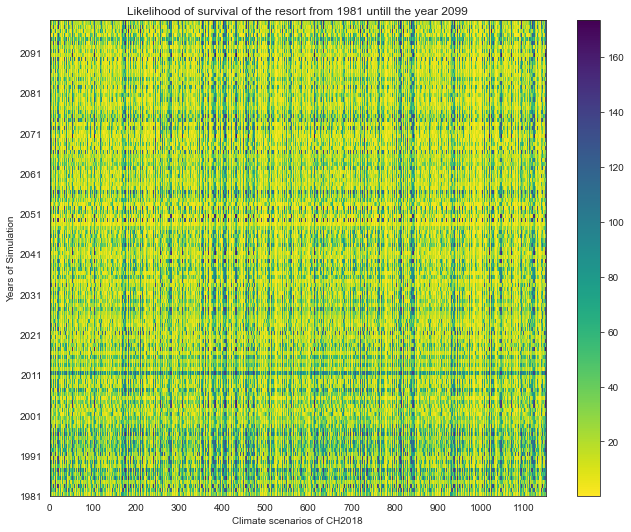

In [90]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

Z = list(df26_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z, cmap='viridis_r')
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, 1150, step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios of CH2018")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

In [ ]:
np.__version__

### Survival AMap CH2018 RCP4.5

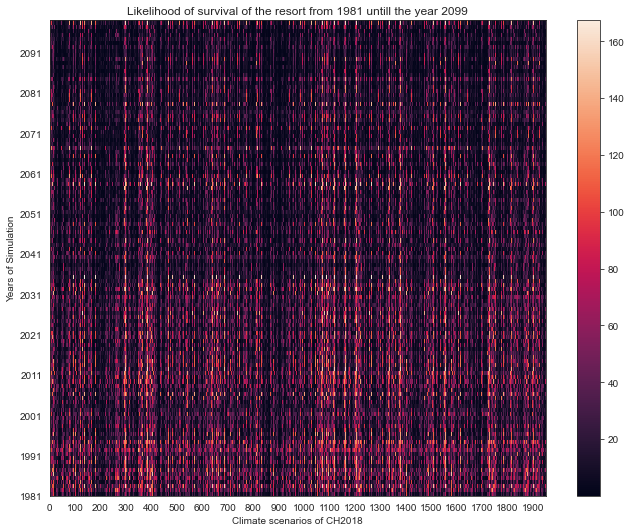

In [91]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

Z = list(df45_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, 1950, step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios of CH2018")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

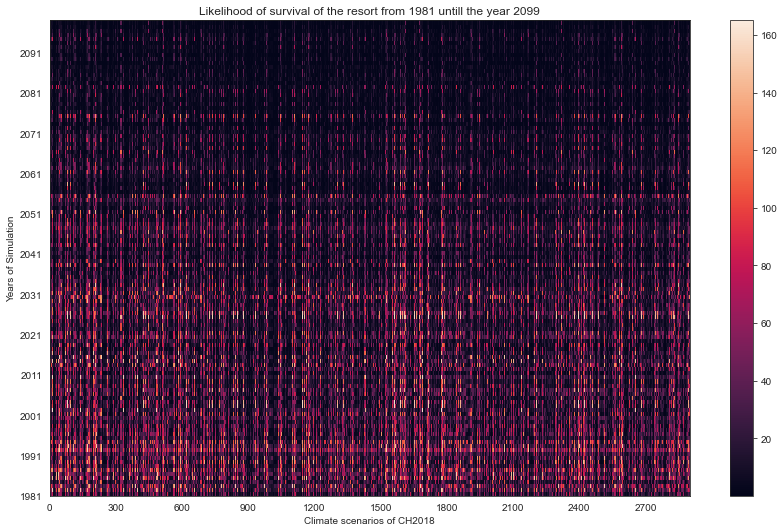

In [92]:
fig, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df85_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, 2900, step=300)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios of CH2018")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

## 3 years of not having good snow days

In [93]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (1 , simulations_Length, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            if float(df[dfColumns[i]].iloc[j]) < 100.0:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [94]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0  1981-1982                                 49.333738760341504     
1  1982-1983                                 109.72649075899479     
2  1983-1984                                 22.596771176087255     
3  1984-1985                                 14.556017727053732     
4  1985-1986                                 15.503858891166125     

  sc_2_['isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp']  \
0                                 51.948232383440235   
1                                  55.18192194712576   
2                                  54.29364350199923   
3                                  58.57966710500545   
4                                 16.764359827026066   

  sc_3_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  6.340623457913726    
1                                 3.2266527550222457    
2                                  10.31435383404728    
3                                 13.660133879201542    
4                                 15.413107080073168    

  sc_4_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  86.22402487492619    
1                                 11.223702379258192    
2                                 24.342743182449738    
3                                  62.42002547463247    
4                                  71.20291183830017    

  sc_5_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  86.84366176739887      
1                                 134.79437662395526      
2                                   94.8786972349895      
3                                  60.56081545963133      
4                                 155.24360170515584      

  sc_6_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp']  \
0                                  37.05783745572006       
1                                  97.47846608854309       
2                                  74.04927654269613       
3                                 103.42683426709448       
4                                  74.19748909448222       

  sc_7_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  12.65603595085656        
1                                  35.35818106847012        
2                                 125.85916821831154        
3                                 19.287352796173757        
4                                  58.34597738049296        

  sc_8_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  5.935450366964158      
1                                 38.095653412744134      
2                                  22.10365873178285      
3                                  7.117998082146582      
4                                 31.662209758581074      

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  ...  \
0                                  4.802623059219976       ...   
1                                 1.6846624470896234       ...   
2                                  7.283908154233272       ...   
3                                 23.272439067833332       ...   
4                                  19.77903238084085       ...   

  sc_1141_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  3.233547154315588        
1                                  14.58624411582777        
2                                 11.109212541222783        
3                                  8.039685378758822        
4                                 1.1073396584677808        

  sc_1142_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  60.75570718014543        
1                                   132.958795960722        
2                                 27.828476967059753        
3                                 17.926092223215097        
4                                 19.093381823945577        


In [95]:
type(df26_all)

pandas.core.frame.DataFrame

In [96]:
df26_allColumns = df26_all.columns

In [97]:
df26_all[df26_allColumns[1]].iloc[0]

'49.333738760341504'

In [98]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0  1981-1982                                 49.333738760341504     
1  1982-1983                                 109.72649075899479     
2  1983-1984                                 22.596771176087255     
3  1984-1985                                 14.556017727053732     
4  1985-1986                                 15.503858891166125     

  sc_2_['isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp']  \
0                                 51.948232383440235   
1                                  55.18192194712576   
2                                  54.29364350199923   
3                                  58.57966710500545   
4                                 16.764359827026066   

  sc_3_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  6.340623457913726    
1                                 3.2266527550222457    
2                                  10.31435383404728    
3                                 13.660133879201542    
4                                 15.413107080073168    

  sc_4_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  86.22402487492619    
1                                 11.223702379258192    
2                                 24.342743182449738    
3                                  62.42002547463247    
4                                  71.20291183830017    

  sc_5_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  86.84366176739887      
1                                 134.79437662395526      
2                                   94.8786972349895      
3                                  60.56081545963133      
4                                 155.24360170515584      

  sc_6_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp']  \
0                                  37.05783745572006       
1                                  97.47846608854309       
2                                  74.04927654269613       
3                                 103.42683426709448       
4                                  74.19748909448222       

  sc_7_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  12.65603595085656        
1                                  35.35818106847012        
2                                 125.85916821831154        
3                                 19.287352796173757        
4                                  58.34597738049296        

  sc_8_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  5.935450366964158      
1                                 38.095653412744134      
2                                  22.10365873178285      
3                                  7.117998082146582      
4                                 31.662209758581074      

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  ...  \
0                                  4.802623059219976       ...   
1                                 1.6846624470896234       ...   
2                                  7.283908154233272       ...   
3                                 23.272439067833332       ...   
4                                  19.77903238084085       ...   

  sc_1141_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  3.233547154315588        
1                                  14.58624411582777        
2                                 11.109212541222783        
3                                  8.039685378758822        
4                                 1.1073396584677808        

  sc_1142_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  60.75570718014543        
1                                   132.958795960722        
2                                 27.828476967059753        
3                                 17.926092223215097        
4                                 19.093381823945577        


In [99]:
T1RCP26 = tipping_points_freq(df26_all)
T1RCP45 = tipping_points_freq(df45_all)
T1RCP85 = tipping_points_freq(df85_all)

In [100]:
df26_all.head()

Season sc_1_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0  1981-1982                                 49.333738760341504     
1  1982-1983                                 109.72649075899479     
2  1983-1984                                 22.596771176087255     
3  1984-1985                                 14.556017727053732     
4  1985-1986                                 15.503858891166125     

  sc_2_['isOverSnow_SMHI-RCA-MIROC-EUR44-RCP26-pcp']  \
0                                 51.948232383440235   
1                                  55.18192194712576   
2                                  54.29364350199923   
3                                  58.57966710500545   
4                                 16.764359827026066   

  sc_3_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  6.340623457913726    
1                                 3.2266527550222457    
2                                  10.31435383404728    
3                                 13.660133879201542    
4                                 15.413107080073168    

  sc_4_['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp']  \
0                                  86.22402487492619    
1                                 11.223702379258192    
2                                 24.342743182449738    
3                                  62.42002547463247    
4                                  71.20291183830017    

  sc_5_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  86.84366176739887      
1                                 134.79437662395526      
2                                   94.8786972349895      
3                                  60.56081545963133      
4                                 155.24360170515584      

  sc_6_['isOverSnow_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp']  \
0                                  37.05783745572006       
1                                  97.47846608854309       
2                                  74.04927654269613       
3                                 103.42683426709448       
4                                  74.19748909448222       

  sc_7_['isOverSnow_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp']  \
0                                  12.65603595085656        
1                                  35.35818106847012        
2                                 125.85916821831154        
3                                 19.287352796173757        
4                                  58.34597738049296        

  sc_8_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                  5.935450366964158      
1                                 38.095653412744134      
2                                  22.10365873178285      
3                                  7.117998082146582      
4                                 31.662209758581074      

  sc_9_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  ...  \
0                                  4.802623059219976       ...   
1                                 1.6846624470896234       ...   
2                                  7.283908154233272       ...   
3                                 23.272439067833332       ...   
4                                  19.77903238084085       ...   

  sc_1141_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  3.233547154315588        
1                                  14.58624411582777        
2                                 11.109212541222783        
3                                  8.039685378758822        
4                                 1.1073396584677808        

  sc_1142_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                  60.75570718014543        
1                                   132.958795960722        
2                                 27.828476967059753        
3                                 17.926092223215097        
4                                 19.093381823945577        


In [101]:
print(len(T1RCP26[:]))
print(len(T1RCP45[:]))
print(len(T1RCP85[:]))

1151
1951
2901


In [102]:
type(T1RCP85)

numpy.ndarray

In [103]:
x_axis = np.arange(1,6004)
x26_axis = np.arange(1,901)
x45_axis = np.arange(902,2752)
x85_axis = np.arange(2753,6003)

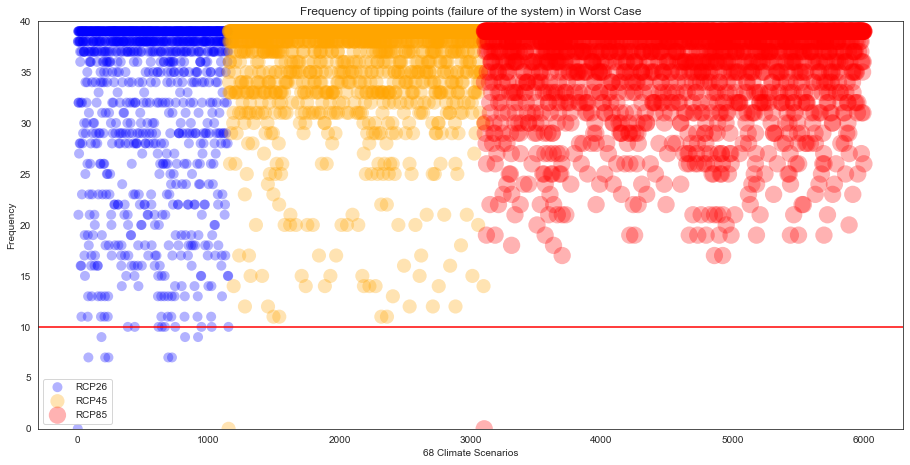

In [107]:
fig, ax1 = plt.subplots(figsize=(15.5,7.5))

ax1.scatter(x_axis[1:1152],T1RCP26[:], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[1152:3103],T1RCP45[:], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[3103:6004],T1RCP85[:-1], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points (failure of the system) in Worst Case")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("68 Climate Scenarios")
ax1.set_ylim(bottom=0, top =40)
ax1.axhline(y=10, color='red')
ax1.legend()


fig.savefig(os.path.join(rootVisualization, 'tipping_point_All.svg'), format='svg', dpi=1200)

### Tables of the paper: Uncertainty analysis of CH2018 randomness scenarios


In [108]:
from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [109]:
def area_max_min_df (df, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario, dx=1)
    areamin1 = trapz(min_scenario, dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario, dx=1)
    areamin2 = simps(min_scenario, dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [110]:
max_scenario = df26_all.max(axis=1)
min_scenario = df26_all.min(axis=1)

In [111]:
max_scenario.to_numpy()

array([95.01458183, 99.85834751, 99.88557269, 98.85448546, 99.97685784,
       99.8078189 , 99.98957495, 99.99469837, 99.81664237, 99.79306751,
       99.97527081, 99.53786177, 99.60953814, 99.81520791, 99.888901  ,
       99.84270806, 99.88726385, 92.46418722, 97.39522511, 97.55929471,
       99.55056666, 94.85949619, 99.85967103, 99.3797647 , 99.79000547,
       99.81362746, 99.82408717, 99.16046191, 99.72044187, 90.81506181,
       99.9022994 , 99.06496409, 99.78085108, 95.33671953, 99.89552708,
       99.87140639, 99.65004728, 94.65581324,  9.99520039, 91.6795038 ,
       99.29139144, 99.59641622, 99.94893935, 99.72800153, 99.980876  ,
       99.78700382, 99.95780262,  9.87792372, 99.74636633, 99.00508598,
       99.66786305, 99.08711251, 91.56376693,  9.98267523, 99.97769882,
       99.93092058, 99.79826452, 99.82307067, 99.31725586,  9.92183228,
       75.71175801, 96.73435525, 99.9106972 , 99.64249773, 99.89116355,
       99.73136349, 99.11262919,  9.98255628, 99.87141451,  9.97

In [112]:
max_scenario.shape

(118,)

In [113]:
print("Resort3 Worst Case")
area_max_min_df (df26_all, 118)
area_max_min_df (df45_all, 118)
area_max_min_df (df85_all, 118)

Resort3 Worst Case
Start************************************************************
Uncertainty Band1 =46.86 days
Uncertainty Band2 =46.86 days
****************************************End

Start************************************************************
Uncertainty Band1 =40.70 days
Uncertainty Band2 =40.70 days
****************************************End

Start************************************************************
Uncertainty Band1 =38.51 days
Uncertainty Band2 =38.51 days
****************************************End



## End